### Import Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pandas_profiling import ProfileReport
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

C:\Users\mohit\AppData\Local\Temp\ipykernel_16004\3882210979.py:4: DeprecationWarning: `import pandas_profiling` is going to be deprecated by April 1st. Please use `import ydata_profiling` instead.
  from pandas_profiling import ProfileReport


### Reading Data

In [2]:
df = pd.read_csv('gurgaon_properties_cleaned_v2.csv')

In [3]:
df.head()

property_type                      society      sector  price  \
0          flat      signature global park 4   sector 36   0.82   
1          flat             smart world gems   sector 89   0.95   
2          flat                pyramid elite   sector 86   0.46   
3          flat       breez global hill view  sohna road   0.32   
4          flat  bestech park view sanskruti   sector 92   1.60   

   price_per_sqft     area                                       areaWithType  \
0          7585.0   1081.0  Super Built up area 1081(100.43 sq.m.)Carpet a...   
1          8600.0   1105.0                   Carpet area: 1103 (102.47 sq.m.)   
2            79.0  58228.0                 Carpet area: 58141 (5401.48 sq.m.)   
3          5470.0    585.0  Built Up area: 1000 (92.9 sq.m.)Carpet area: 5...   
4          8020.0   1995.0  Super Built up area 1995(185.34 sq.m.)Built Up...   

   bedRoom  bathroom balcony  ...  super_built_up_area built_up_area  \
0        3         2       2  ...               1081.0           NaN   
1        2         2       2  ...                  NaN           NaN   
2        2         2       1  ...                  NaN           NaN   
3        2         2       1  ...                  NaN        1000.0   
4        3         4      3+  ...               1995.0        1615.0   

  carpet_area  study room  servant room  store room  pooja room  others  \
0       650.0           0             0           0           0       0   
1      1103.0           1             1           0           0       0   
2     58141.0           0             0           0           0       0   
3       585.0           0             0           0           0       0   
4      1476.0           0             1           0           0       1   

   furnishing_type  luxury_score  
0                0             8  
1                0            38  
2                0            15  
3                0            49  
4                1           174  

[5 rows x 23 columns]

In [4]:
df.shape

(3803, 23)

In [5]:
df.duplicated().sum()

126

In [6]:
df.drop_duplicates(inplace = True)

In [7]:
df.head()

property_type                      society      sector  price  \
0          flat      signature global park 4   sector 36   0.82   
1          flat             smart world gems   sector 89   0.95   
2          flat                pyramid elite   sector 86   0.46   
3          flat       breez global hill view  sohna road   0.32   
4          flat  bestech park view sanskruti   sector 92   1.60   

   price_per_sqft     area                                       areaWithType  \
0          7585.0   1081.0  Super Built up area 1081(100.43 sq.m.)Carpet a...   
1          8600.0   1105.0                   Carpet area: 1103 (102.47 sq.m.)   
2            79.0  58228.0                 Carpet area: 58141 (5401.48 sq.m.)   
3          5470.0    585.0  Built Up area: 1000 (92.9 sq.m.)Carpet area: 5...   
4          8020.0   1995.0  Super Built up area 1995(185.34 sq.m.)Built Up...   

   bedRoom  bathroom balcony  ...  super_built_up_area built_up_area  \
0        3         2       2  ...               1081.0           NaN   
1        2         2       2  ...                  NaN           NaN   
2        2         2       1  ...                  NaN           NaN   
3        2         2       1  ...                  NaN        1000.0   
4        3         4      3+  ...               1995.0        1615.0   

  carpet_area  study room  servant room  store room  pooja room  others  \
0       650.0           0             0           0           0       0   
1      1103.0           1             1           0           0       0   
2     58141.0           0             0           0           0       0   
3       585.0           0             0           0           0       0   
4      1476.0           0             1           0           0       1   

   furnishing_type  luxury_score  
0                0             8  
1                0            38  
2                0            15  
3                0            49  
4                1           174  

[5 rows x 23 columns]

### EDA

### property_type

In [8]:
df['property_type'].isna().sum()

0

<Axes: xlabel='property_type'>

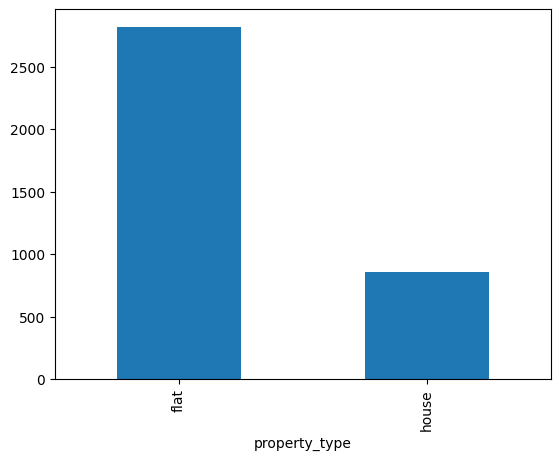

In [9]:
df['property_type'].value_counts().plot(kind='bar')

***observation**
- flats are in majority and houses are less
- No missing values

### society

In [10]:
df['society'].value_counts()

society
independent                               486
tulip violet                               75
ss the leaf                                73
dlf new town heights                       42
shapoorji pallonji joyville gurugram       42
                                         ... 
dlf gardencity enclave                      1
nitin vihar                                 1
landmark the residency                      1
kw royal court                              1
surendra homes dayaindependentd colony      1
Name: count, Length: 676, dtype: int64

In [11]:
df[df['society'] != 'independent']['society'].value_counts(normalize=True).cumsum().head(75)

society
tulip violet                            0.023511
ss the leaf                             0.046395
shapoorji pallonji joyville gurugram    0.059561
dlf new town heights                    0.072727
signature global park                   0.083699
                                          ...   
ramsons kshitij                         0.490282
umang monsoon breeze                    0.494357
ats kocoon                              0.498433
ireo the corridors                      0.502194
central park flower valley              0.505956
Name: proportion, Length: 75, dtype: float64

In [12]:
society_counts = df['society'].value_counts()

# Frequency distribution for societies
frequency_bins = {
    'very high (>100)':(society_counts > 100).sum(),
    'high (50-100)' : ((society_counts >= 50 )& (society_counts <= 100)).sum(),
    'Average( 10-49)': ((society_counts >= 10 )& (society_counts < 50)).sum(),
    'Low (2-9)' : ((society_counts > 1 )& (society_counts < 10)).sum(),
    'very low (1)': (society_counts > 1).sum()
}

frequency_bins

{'very high (>100)': 1,
 'high (50-100)': 2,
 'Average( 10-49)': 92,
 'Low (2-9)': 273,
 'very low (1)': 368}

<Axes: xlabel='society'>

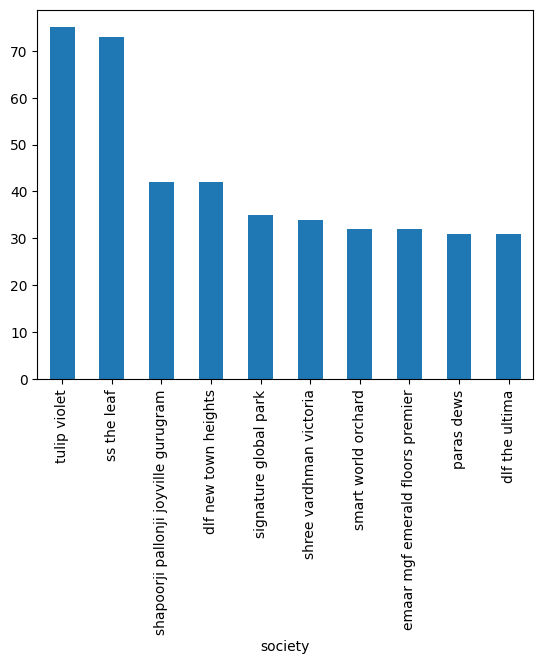

In [13]:
# top 10 society
df[df['society'] != 'independent']['society'].value_counts().head(10).plot(kind='bar')

In [14]:
df['society'].isnull().sum()

1

In [15]:
df[df['society'].isnull()]

property_type society     sector  price  price_per_sqft    area  \
2693          flat     NaN  sector 78    0.6          3692.0  1625.0   

                            areaWithType  bedRoom  bathroom balcony  ...  \
2693  Built Up area: 1625 (150.97 sq.m.)        2         2       0  ...   

      super_built_up_area built_up_area carpet_area  study room  servant room  \
2693                  NaN        1625.0         NaN           0             0   

      store room  pooja room  others  furnishing_type  luxury_score  
2693           0           0       0                0             0  

[1 rows x 23 columns]

**Observations**
- Around 13% properties comes under independent tag.
- There are 675 societies.
- The top 75 societies have 50 percent of the preperties and the rest 50 percent of the properties come under the remaining - 600 societies
- Very High (>100): Only 1 society has more than 100 listings.
- High (50-100): 2 societies have between 50 to 100 listings.
- Average (10-49): 92 societies fall in this range with 10 to 49 listings each.
- Low (2-9): 273 societies have between 2 to 9 listings.
- Very Low (1): A significant number, 308 societies, have only 1 listing.
- 1 missing value

### sector

In [16]:
df['sector'].value_counts().shape

(104,)

<Axes: xlabel='sector'>

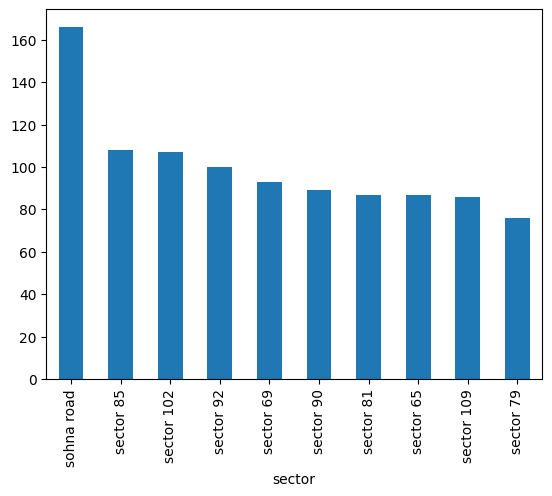

In [17]:
# top 10 sector
df['sector'].value_counts().head(10).plot(kind='bar')

In [18]:
# Frequency distribution for sectors
sector_counts = df['sector'].value_counts()

sector_frequency_bins = {
    "Very High (>100)": (sector_counts > 100).sum(),
    "High (50-100)": ((sector_counts >= 50) & (sector_counts <= 100)).sum(),
    "Average (10-49)": ((sector_counts >= 10) & (sector_counts < 50)).sum(),
    "Low (2-9)": ((sector_counts > 1) & (sector_counts < 10)).sum(),
    "Very Low (1)": (sector_counts == 1).sum()
}

sector_frequency_bins

{'Very High (>100)': 3,
 'High (50-100)': 25,
 'Average (10-49)': 60,
 'Low (2-9)': 16,
 'Very Low (1)': 0}

**Observations**
- There are a total of 104 unique sectors in the dataset.
- Frequency distribution of sectors:
- Very High (>100): 3 sectors have more than 100 listings.
- High (50-100): 25 sectors have between 50 to 100 listings.
- Average (10-49): A majority, 60 sectors, fall in this range with 10 to 49 listings each.
- Low (2-9): 16 sectors have between 2 to 9 listings.
- Very Low (1): Interestingly, there are no sectors with only 1 listing.

### price

In [19]:
df['price'].isnull().sum()

17

In [20]:
df['price'].describe()

count    3660.000000
mean        2.533664
std         2.980623
min         0.070000
25%         0.950000
50%         1.520000
75%         2.750000
max        31.500000
Name: price, dtype: float64

<Axes: xlabel='price', ylabel='Count'>

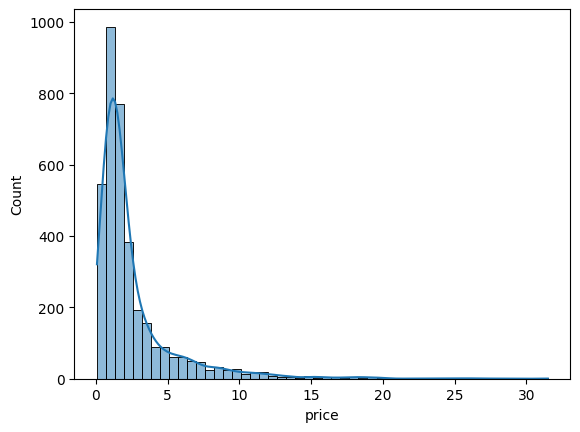

In [21]:
sns.histplot(df['price'],kde=True,bins=50)

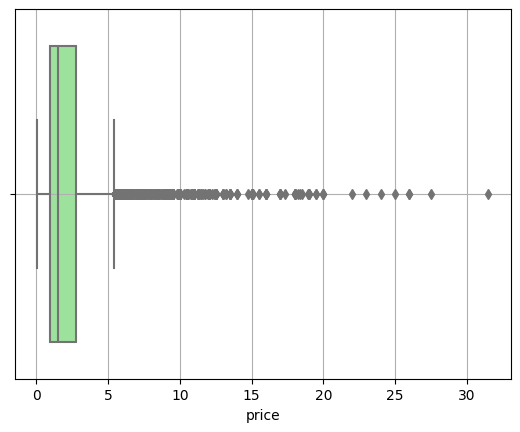

In [22]:
sns.boxplot(x=df['price'],color='lightgreen')
plt.grid()

**Descriptive Statistics:**

 - Count: There are 3,660 non-missing price entries.
 - Mean Price: The average price is approximately 2.53 crores.
 - Median Price: The median (or 50th percentile) price is 1.52 crores.
 - Standard Deviation: The prices have a standard deviation of 2.98, indicating variability in the prices.
 - Range: Prices range from a minimum of 0.07 crores to a maximum of 31.5 crores.
 - IQR: The interquartile range (difference between 75th and 25th percentile) is from 0.95 crores to 2.75 crores.
**Visualizations:**

- Distribution: The histogram indicates that most properties are priced in the lower range (below 5 crores), with a few properties going beyond 10 crores.
- Box Plot: The box plot showcases the spread of the data and potential outliers. Properties priced above approximately 10 crores might be considered outliers as they lie beyond the upper whisker of the box plot.
- Missing Values: There are 17 missing values in the price column.

In [23]:
# skewness and kurtosis

skewness = df['price'].skew()
kurtosis = df['price'].kurt()
print(f'skewness is : {skewness} ')
print(f'kurtosis is : {kurtosis} ')

skewness is : 3.2791704733134623 
kurtosis is : 14.933372629214258 


**Skewness**: The price distribution has a skewness of approximately 3.28, indicating a positive skew. This means that the distribution tail is skewed to the right, which aligns with our observation from the histogram where most properties have prices on the lower end with a few high-priced properties.

**Kurtosis**: The kurtosis value is approximately 14.93. A kurtosis value greater than 3 indicates a distribution with heavier tails and more outliers compared to a normal distribution.

In [24]:
# Quantile Analysis
quantiles = df['price'].quantile([0.01, 0.05, 0.95, 0.99])

quantiles

0.01     0.250
0.05     0.370
0.95     8.500
0.99    15.264
Name: price, dtype: float64

**Quantile Analysis:**- 

- 1% Quantile: Only 1% of properties are priced below 0.25 crores.
- 5% Quantile: 5% of properties are priced below 0.37 crores.
- 95% Quantile: 95% of properties are priced below 8.5 crores.
- 99% Quantile: 99% of properties are priced below 15.26 crores, indicating that very few properties are priced above this value.

In [25]:
# Identify potential outliers using IQR method
Q1 = df['price'].describe()['25%']
Q3 = df['price'].describe()['75%']
IQR = Q3 - Q1

IQR

1.8

In [26]:
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

print(lower_bound, upper_bound)

-1.7500000000000002 5.45


In [27]:
outliers = df[(df['price'] < lower_bound) | (df['price'] > upper_bound)]
outliers.shape

(425, 23)

In [28]:
outliers['price'].describe()

count    425.000000
mean       9.235624
std        4.065259
min        5.460000
25%        6.460000
50%        8.000000
75%       10.750000
max       31.500000
Name: price, dtype: float64

**Outliers Analysis (using IQR method):**

- Based on the IQR method, there are 425 properties considered as outliers.
- These outliers have an average price of approximately 9.24 crores.
- The range for these outliers is from 5.46 crores to 31.5 crores.

<Axes: xlabel='price'>

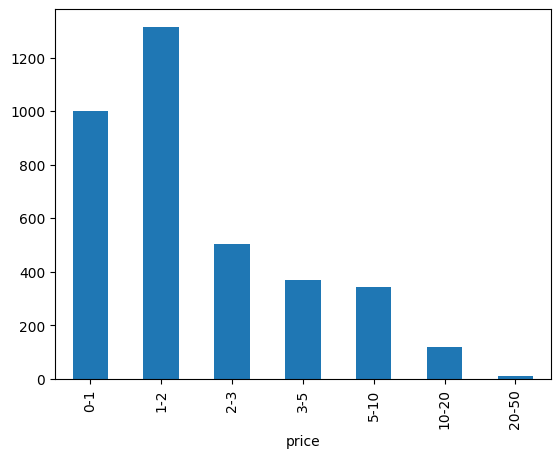

In [29]:
# price binning
bins = [0, 1, 2, 3, 5, 10, 20, 50]
bin_labels = ["0-1", "1-2", "2-3", "3-5", "5-10", "10-20", "20-50"]
pd.cut(df['price'], bins=bins, labels=bin_labels, right=False).value_counts().sort_index().plot(kind='bar')

- The majority of properties are priced in the "1-2 crores" and "2-3 crores" ranges.
- There's a significant drop in the number of properties priced above "5 crores."

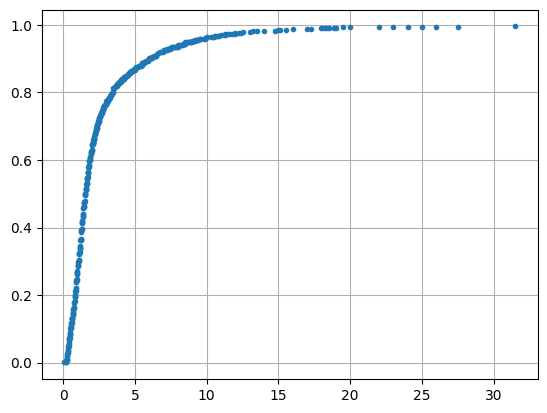

In [30]:
# ecdf plot
ecdf = df['price'].value_counts().sort_index().cumsum() / len(df['price'])
plt.plot(ecdf.index, ecdf, marker='.', linestyle='none')
plt.grid()

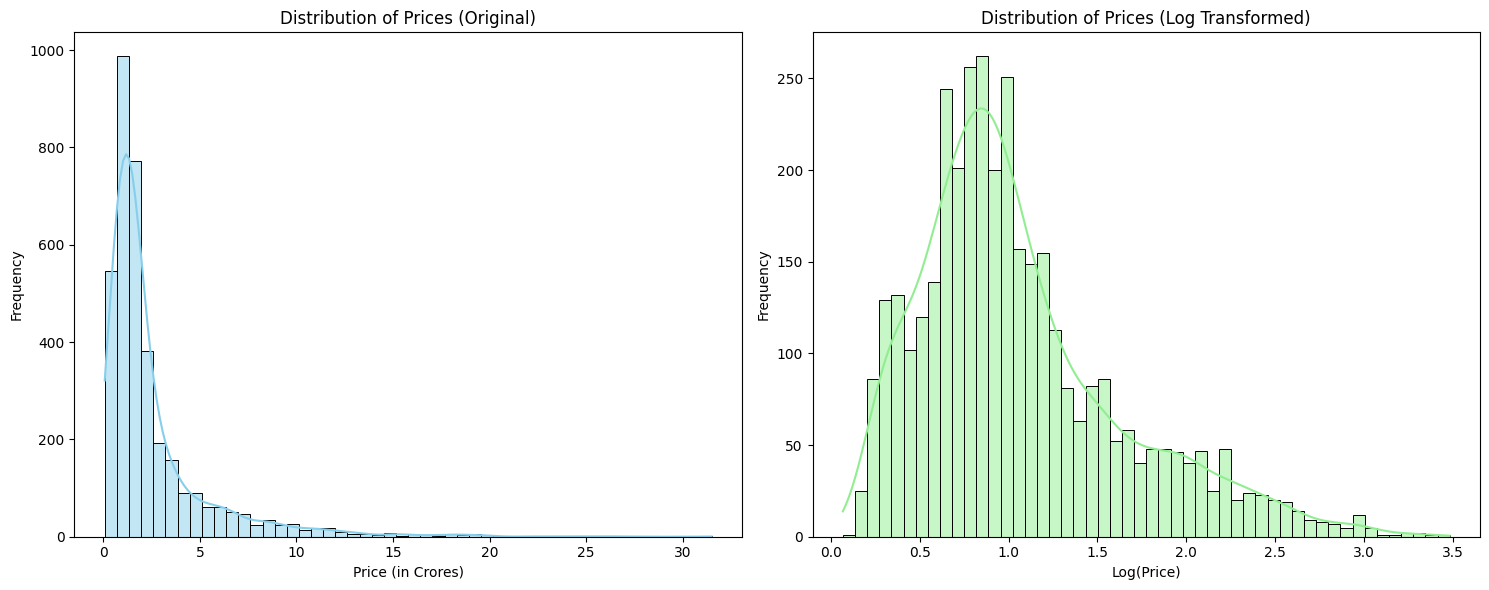

In [31]:

plt.figure(figsize=(15, 6))

# Distribution plot without log transformation
plt.subplot(1, 2, 1)
sns.histplot(df['price'], kde=True, bins=50, color='skyblue')
plt.title('Distribution of Prices (Original)')
plt.xlabel('Price (in Crores)')
plt.ylabel('Frequency')

# Distribution plot with log transformation
plt.subplot(1, 2, 2)
sns.histplot(np.log1p(df['price']), kde=True, bins=50, color='lightgreen')
plt.title('Distribution of Prices (Log Transformed)')
plt.xlabel('Log(Price)')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

- np.log1p(x): This function computes the natural logarithm of 1+x. It's designed to provide more accurate results for values of x that are very close to zero.

- Using np.log1p helps in transforming the price column while ensuring that any value (including zero, if present) is handled appropriately. When we need to reverse the transformation, we can use np.expm1 which computes e^x-1

In [32]:
skewness = np.log1p(df['price']).skew()
kurtosis = np.log1p(df['price']).kurt()

print(skewness,kurtosis)

1.0740709565255315 0.9646692415449296


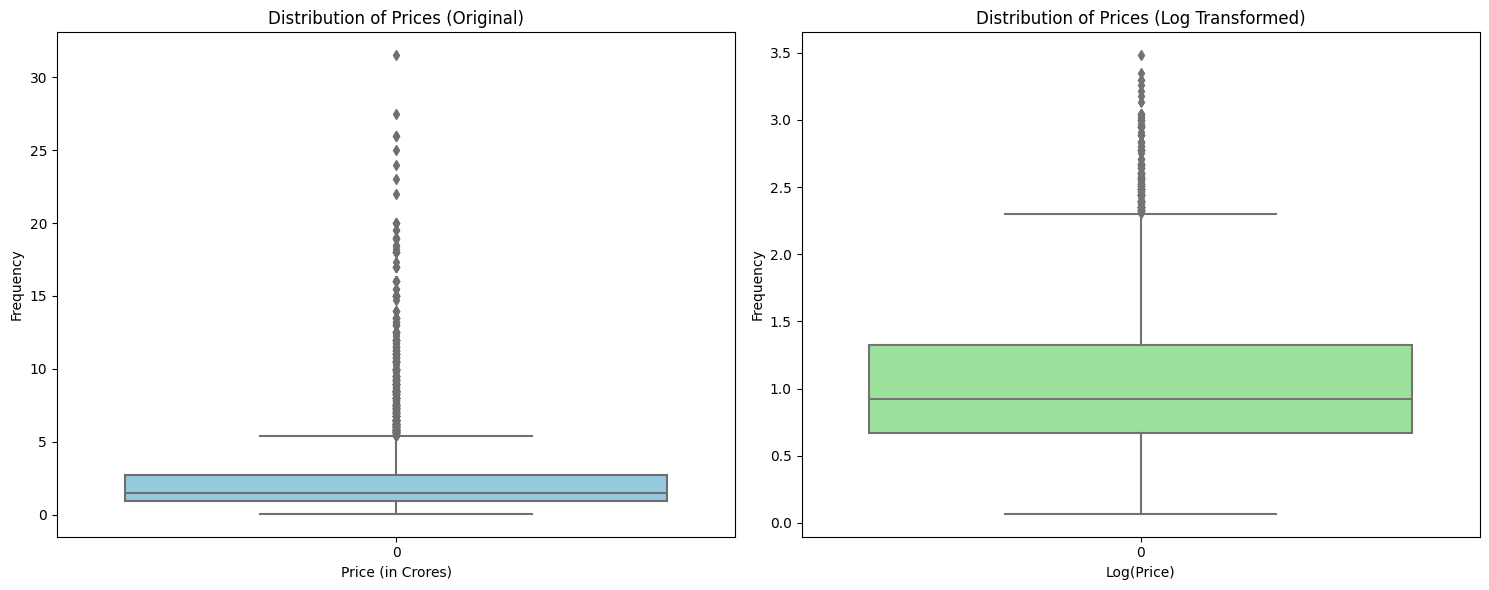

In [33]:
plt.figure(figsize=(15, 6))

# Distribution plot without log transformation
plt.subplot(1, 2, 1)
sns.boxplot(df['price'], color='skyblue')
plt.title('Distribution of Prices (Original)')
plt.xlabel('Price (in Crores)')
plt.ylabel('Frequency')

# Distribution plot with log transformation
plt.subplot(1, 2, 2)
sns.boxplot(np.log1p(df['price']), color='lightgreen')
plt.title('Distribution of Prices (Log Transformed)')
plt.xlabel('Log(Price)')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

### price_per_sqft

In [34]:
df['price_per_sqft'].isnull().sum()

17

In [35]:
df['price_per_sqft'].describe()

count      3660.000000
mean      13892.668306
std       23210.067190
min           4.000000
25%        6817.250000
50%        9020.000000
75%       13880.500000
max      600000.000000
Name: price_per_sqft, dtype: float64

<Axes: xlabel='price_per_sqft', ylabel='Count'>

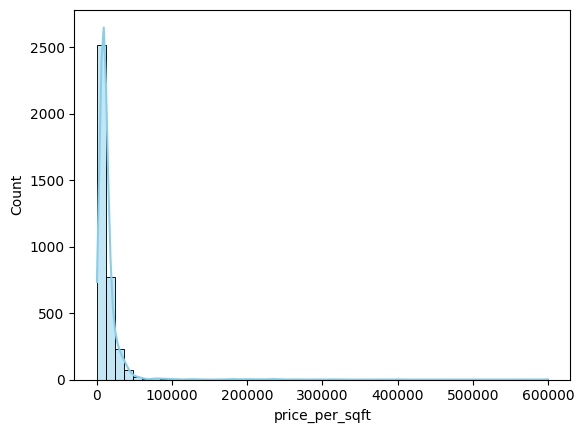

In [36]:
sns.histplot(df['price_per_sqft'], bins=50, color='skyblue', kde=True)

- Most properties have a price_per_sqft ranging between approximately ₹0 and ₹40,000. There is a significant concentration in the lower range, with a few properties having exceptionally high price_per_sqft.

<Axes: >

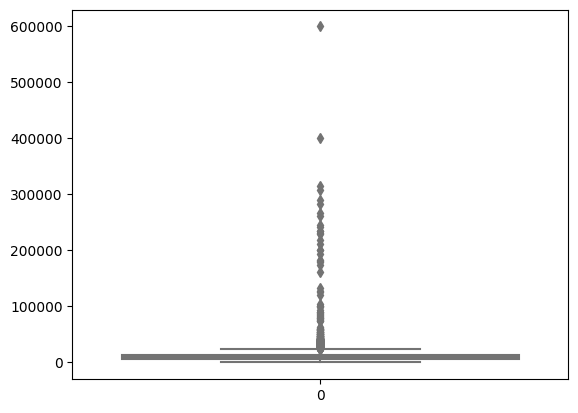

In [37]:
sns.boxplot(df['price_per_sqft'], color='lightgreen')

- The box plot clearly shows several outliers, especially on the higher side. The interquartile range (IQR) is relatively compact, but there are many data points beyond the "whiskers" of the box plot, indicating potential outliers


### Observations
- Potential Outliers
- Right Skewed
- 17 missing values- 

### bedRoom


In [38]:
df['bedRoom'].isnull().sum()

0

<Axes: xlabel='bedRoom'>

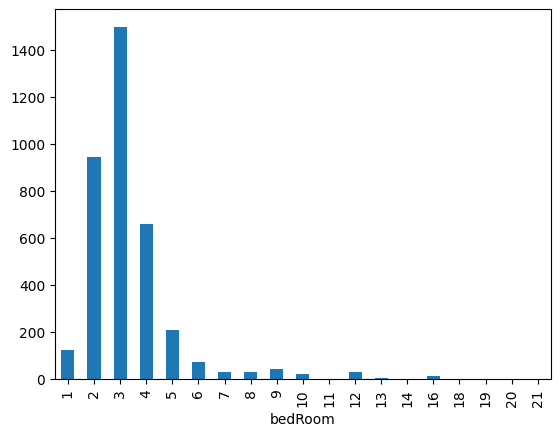

In [39]:
df['bedRoom'].value_counts().sort_index().plot(kind='bar')


<Axes: ylabel='proportion'>

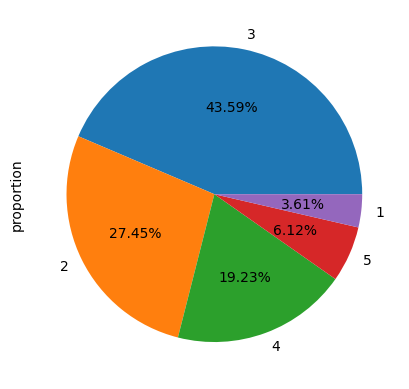

In [40]:
df['bedRoom'].value_counts(normalize=True).head().plot(kind='pie',autopct='%0.2f%%')

### bathroom


In [41]:
df['bathroom'].isnull().sum()

0

<Axes: xlabel='bathroom'>

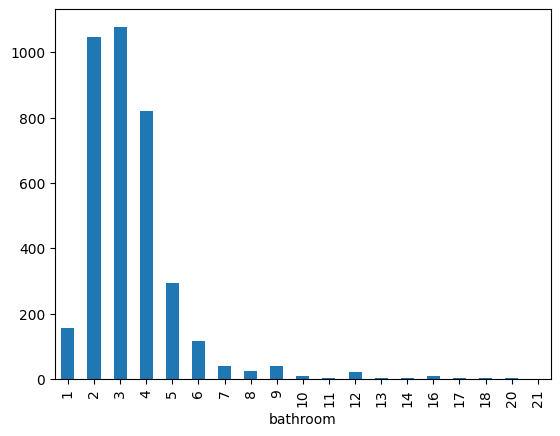

In [42]:
df['bathroom'].value_counts().sort_index().plot(kind='bar')

<Axes: ylabel='proportion'>

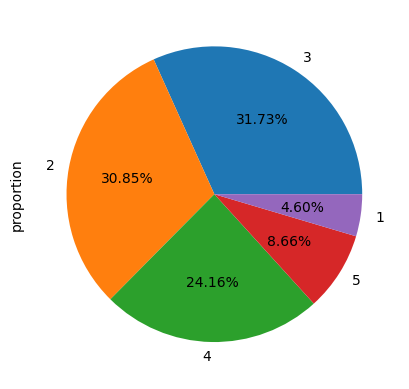

In [43]:
df['bathroom'].value_counts(normalize=True).head().plot(kind='pie',autopct='%0.2f%%')

In [44]:
df.head()

property_type                      society      sector  price  \
0          flat      signature global park 4   sector 36   0.82   
1          flat             smart world gems   sector 89   0.95   
2          flat                pyramid elite   sector 86   0.46   
3          flat       breez global hill view  sohna road   0.32   
4          flat  bestech park view sanskruti   sector 92   1.60   

   price_per_sqft     area                                       areaWithType  \
0          7585.0   1081.0  Super Built up area 1081(100.43 sq.m.)Carpet a...   
1          8600.0   1105.0                   Carpet area: 1103 (102.47 sq.m.)   
2            79.0  58228.0                 Carpet area: 58141 (5401.48 sq.m.)   
3          5470.0    585.0  Built Up area: 1000 (92.9 sq.m.)Carpet area: 5...   
4          8020.0   1995.0  Super Built up area 1995(185.34 sq.m.)Built Up...   

   bedRoom  bathroom balcony  ...  super_built_up_area built_up_area  \
0        3         2       2  ...               1081.0           NaN   
1        2         2       2  ...                  NaN           NaN   
2        2         2       1  ...                  NaN           NaN   
3        2         2       1  ...                  NaN        1000.0   
4        3         4      3+  ...               1995.0        1615.0   

  carpet_area  study room  servant room  store room  pooja room  others  \
0       650.0           0             0           0           0       0   
1      1103.0           1             1           0           0       0   
2     58141.0           0             0           0           0       0   
3       585.0           0             0           0           0       0   
4      1476.0           0             1           0           0       1   

   furnishing_type  luxury_score  
0                0             8  
1                0            38  
2                0            15  
3                0            49  
4                1           174  

[5 rows x 23 columns]

### balcony


In [45]:
df['balcony'].isnull().sum()

0

<Axes: xlabel='balcony'>

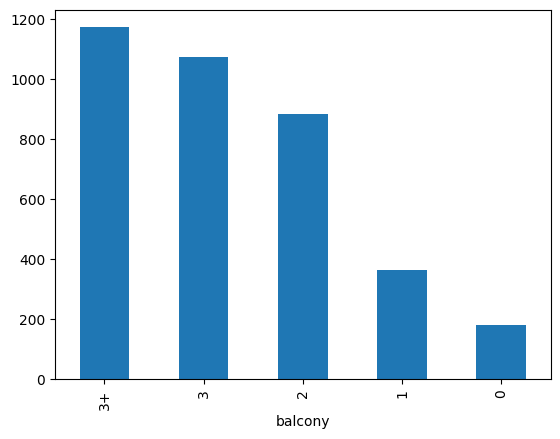

In [46]:
df['balcony'].value_counts().plot(kind='bar')

<Axes: ylabel='proportion'>

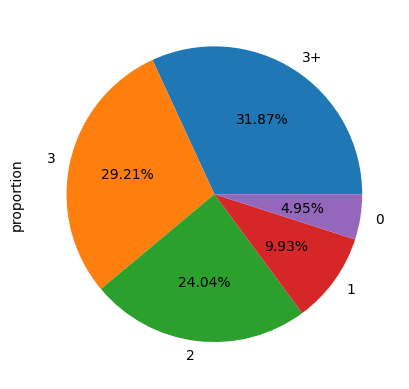

In [47]:
df['balcony'].value_counts(normalize=True).head().plot(kind='pie',autopct='%0.2f%%')

### floorNum


In [48]:
df.iloc[:,10:].head()

floorNum      facing       agePossession  super_built_up_area  \
0       2.0         NaN        New Property               1081.0   
1       4.0         NaN        New Property                  NaN   
2       0.0         NaN  Under Construction                  NaN   
3      17.0         NaN        New Property                  NaN   
4      10.0  North-West      Relatively New               1995.0   

   built_up_area  carpet_area  study room  servant room  store room  \
0            NaN        650.0           0             0           0   
1            NaN       1103.0           1             1           0   
2            NaN      58141.0           0             0           0   
3         1000.0        585.0           0             0           0   
4         1615.0       1476.0           0             1           0   

   pooja room  others  furnishing_type  luxury_score  
0           0       0                0             8  
1           0       0                0            38  
2           0       0                0            15  
3           0       0                0            49  
4           0       1                1           174

In [49]:
df['floorNum'].isnull().sum()

19

In [50]:
df['floorNum'].describe()


count    3658.000000
mean        6.798250
std         6.012454
min         0.000000
25%         2.000000
50%         5.000000
75%        10.000000
max        51.000000
Name: floorNum, dtype: float64

<Axes: xlabel='floorNum'>

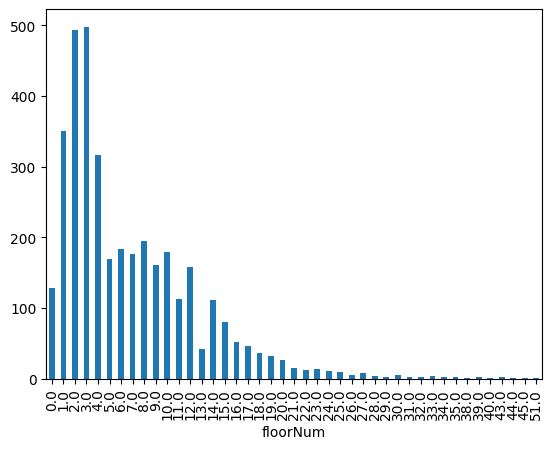

In [51]:
df['floorNum'].value_counts().sort_index().plot(kind='bar')


<Axes: >

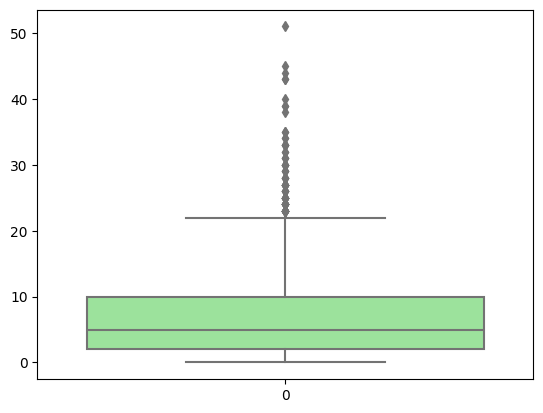

In [52]:
sns.boxplot(df['floorNum'], color='lightgreen')

- The majority of the properties lie between the ground floor (0) and the 25th floor.
- Floors 1 to 4 are particularly common, with the 3rd floor being the most frequent.
- There are a few properties located at higher floors, but their frequency is much lower.
- The box plot reveals that the majority of the properties are concentrated around the lower floors. The interquartile range (IQR) lies between approximately the 2nd and 10th floors.
- Data points beyond the "whiskers" of the box plot, especially on the higher side, indicate potential outliers.

### facing


In [53]:
df['facing'].isnull().sum()

1045

In [54]:
df['facing'].fillna('NA',inplace=True)


In [55]:
df['facing'].value_counts()


facing
NA            1045
North-East     623
East           623
North          387
West           249
South          231
North-West     193
South-East     173
South-West     153
Name: count, dtype: int64

### agePossession


In [56]:
df['agePossession'].isnull().sum()


0

In [57]:
df['agePossession'].value_counts()


agePossession
Relatively New        1646
New Property           593
Moderately Old         563
Undefined              306
Old Property           303
Under Construction     266
Name: count, dtype: int64

### areas


In [58]:
# super built up area
df['super_built_up_area'].isnull().sum()

1802

In [59]:
df['super_built_up_area'].describe()


count     1875.000000
mean      1925.237627
std        764.172177
min         89.000000
25%       1479.500000
50%       1828.000000
75%       2215.000000
max      10000.000000
Name: super_built_up_area, dtype: float64

<Axes: xlabel='super_built_up_area', ylabel='Count'>

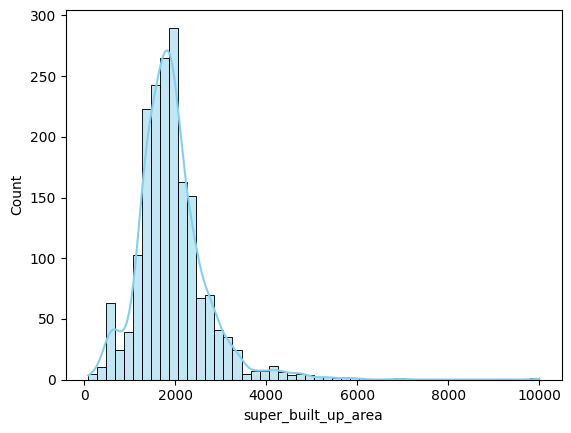

In [60]:
sns.histplot(df['super_built_up_area'].dropna(), bins=50, color='skyblue', kde=True)


<Axes: >

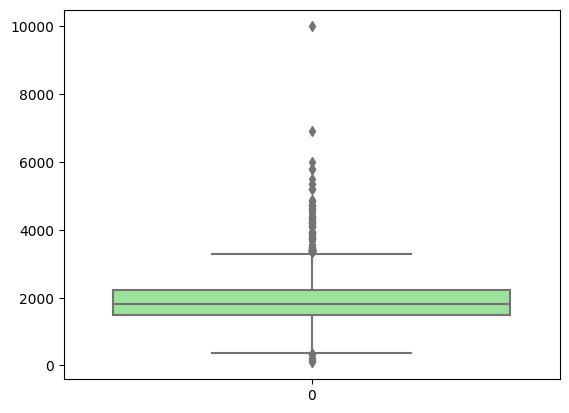

In [61]:
sns.boxplot(df['super_built_up_area'].dropna(), color='lightgreen')


- Most properties have a super built-up area ranging between approximately 1,000 sq.ft and 2,500 sq.ft.
- There are a few properties with a significantly larger area, leading to a right-skewed distribution.
- The interquartile range (IQR) lies between roughly 1,480 sq.ft and 2,215 sq.ft, indicating that the middle 50% of the properties fall within this range.
- There are several data points beyond the upper "whisker" of the box plot, indicating potential outliers. These are properties with an unusually large super built-up area.- 

In [62]:
# built up area
df['built_up_area'].isnull().sum()

1987

In [63]:
df['built_up_area'].describe()


count      1690.000000
mean       2379.585816
std       17942.880237
min           2.000000
25%        1100.000000
50%        1650.000000
75%        2400.000000
max      737147.000000
Name: built_up_area, dtype: float64

<Axes: xlabel='built_up_area', ylabel='Count'>

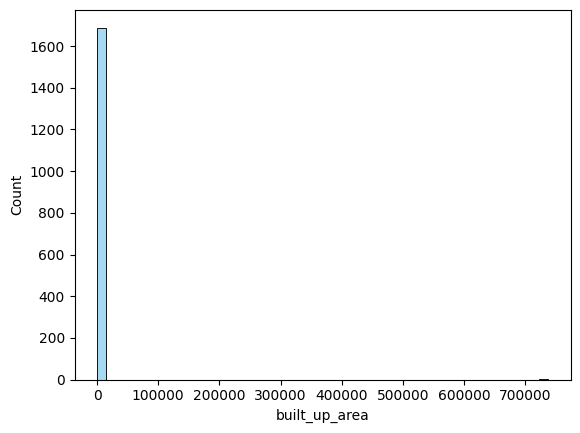

In [64]:
sns.histplot(df['built_up_area'].dropna(), bins=50, color='skyblue', kde=False)


<Axes: >

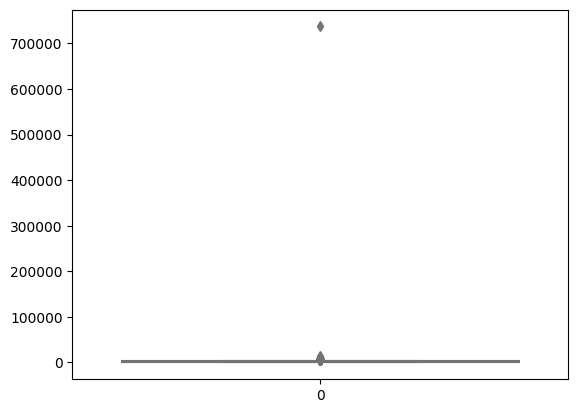

In [65]:
sns.boxplot(df['built_up_area'], color='lightgreen')

- Most properties have a built-up area ranging roughly between 500 sq.ft and 3,500 sq.ft.
- There are very few properties with a much larger built-up area, leading to a highly right-skewed distribution.
- The box plot confirms the presence of significant outliers on the higher side. The data's interquartile range (IQR) is relatively compact, but the "whiskers" of the box plot are stretched due to the outliers.
- The presence of extreme values, especially on the higher side, suggests that there may be outliers or data errors. This could also be due to some properties being exceptionally large, like a commercial complex or an entire building being listed.

In [66]:
# carpet area
df['carpet_area'].isnull().sum()

1805

In [67]:
df['carpet_area'].describe()

count      1872.000000
mean       2529.179507
std       22799.836449
min          15.000000
25%         843.000000
50%        1300.000000
75%        1790.000000
max      607936.000000
Name: carpet_area, dtype: float64

<Axes: xlabel='carpet_area', ylabel='Count'>

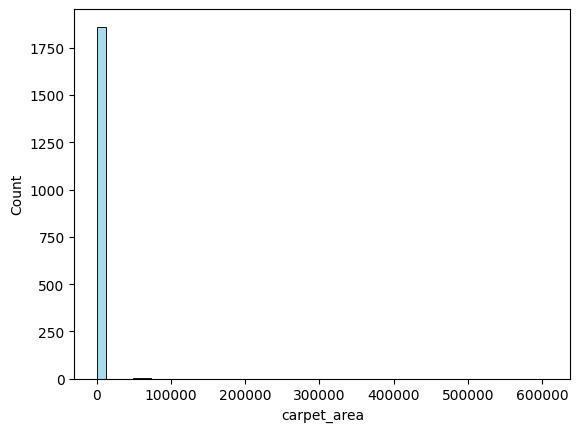

In [68]:
sns.histplot(df['carpet_area'].dropna(), bins=50, color='skyblue', kde=False)


<Axes: >

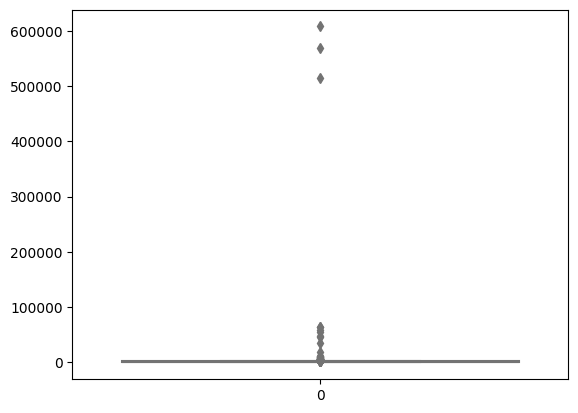

In [69]:
sns.boxplot(df['carpet_area'].dropna(), color='lightgreen')


In [70]:
df.iloc[:,16:]


study room  servant room  store room  pooja room  others  \
0              0             0           0           0       0   
1              1             1           0           0       0   
2              0             0           0           0       0   
3              0             0           0           0       0   
4              0             1           0           0       1   
...          ...           ...         ...         ...     ...   
3798           0             0           0           0       0   
3799           1             1           1           1       0   
3800           0             0           0           0       0   
3801           1             1           1           1       0   
3802           0             0           0           0       0   

      furnishing_type  luxury_score  
0                   0             8  
1                   0            38  
2                   0            15  
3                   0            49  
4                   1           174  
...               ...           ...  
3798                0            73  
3799                0           160  
3800                1            67  
3801                0            76  
3802                1           126  

[3677 rows x 7 columns]

### additional rooms


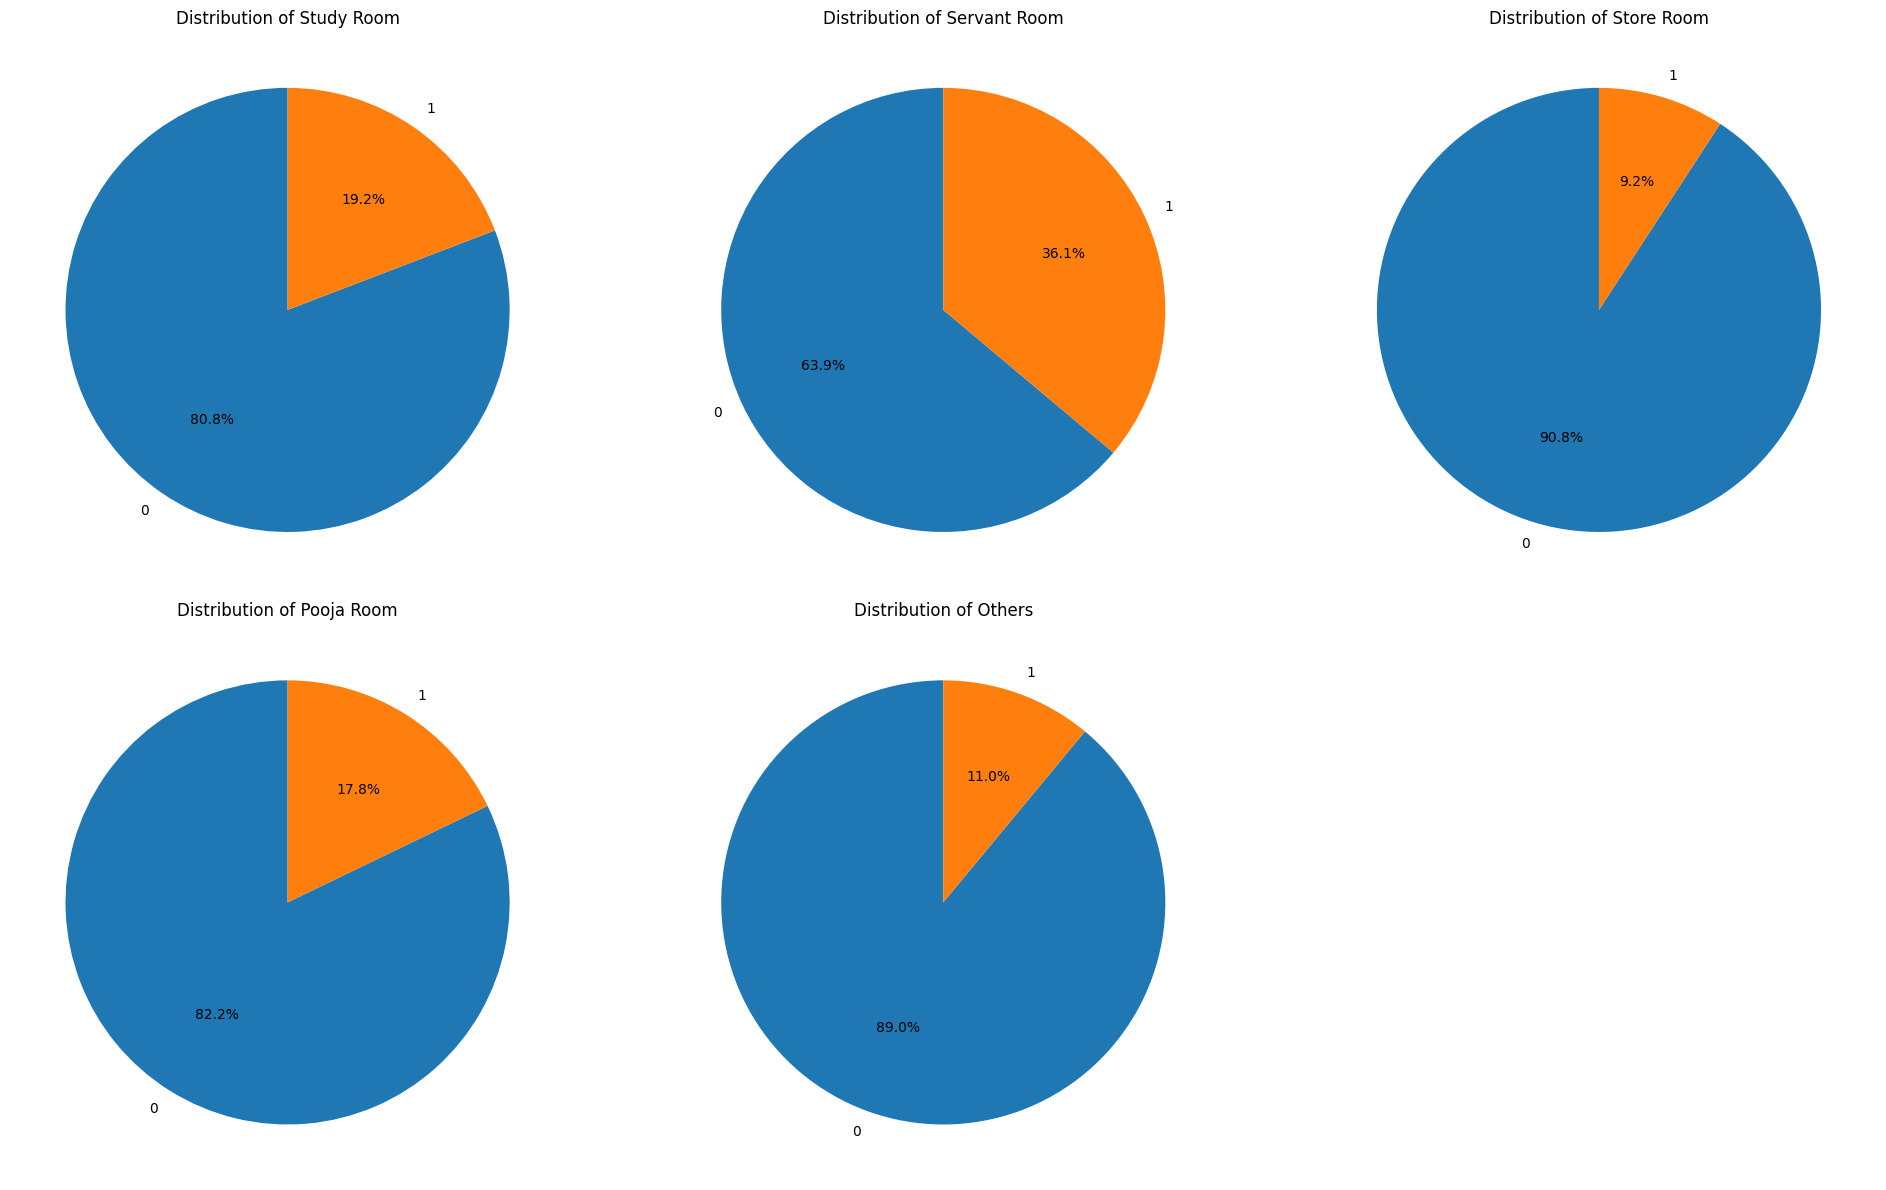

In [71]:
plt.figure(figsize=(20, 12))

# Create a subplot of pie charts for each room type
for idx, room in enumerate(['study room','servant room','store room','pooja room','others'], 1):
    ax = plt.subplot(2, 3, idx)
    df[room].value_counts().plot.pie(autopct='%1.1f%%', startangle=90, ax=ax)
    plt.title(f'Distribution of {room.title()}')
    plt.ylabel('')

plt.tight_layout()
plt.show()

### furnishing_type

In [72]:
df['furnishing_type'].value_counts()

furnishing_type
0    2411
1    1059
2     207
Name: count, dtype: int64

<Axes: ylabel='count'>

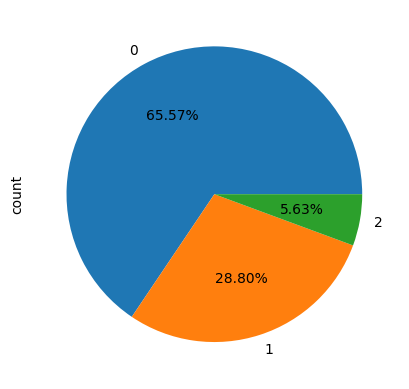

In [73]:
df['furnishing_type'].value_counts().plot(kind='pie',autopct='%0.2f%%')


### luxury score


In [74]:
df['luxury_score'].isnull().sum()


0

In [75]:
df['luxury_score'].describe()


count    3677.000000
mean       71.512918
std        53.059082
min         0.000000
25%        31.000000
50%        59.000000
75%       110.000000
max       174.000000
Name: luxury_score, dtype: float64

<Axes: xlabel='luxury_score', ylabel='Count'>

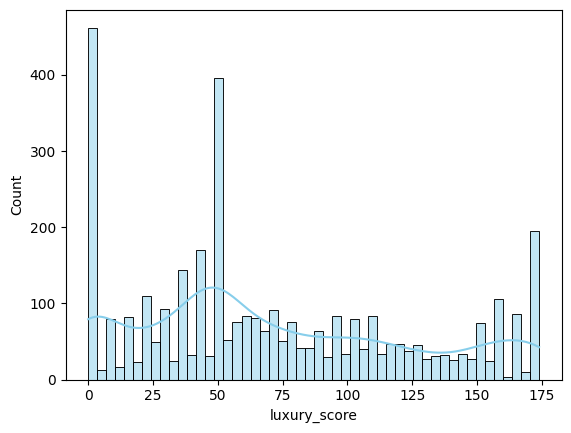

In [76]:
sns.histplot(df['luxury_score'], bins=50, color='skyblue', kde=True)


<Axes: >

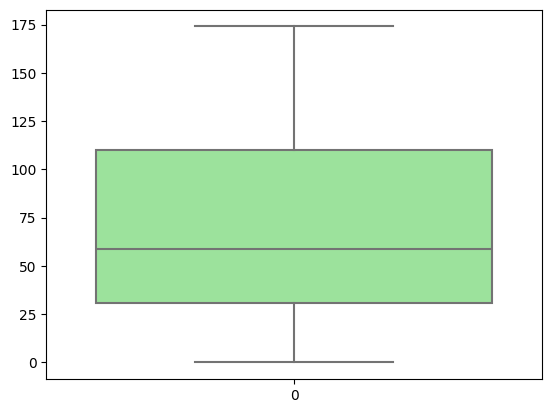

In [77]:
sns.boxplot(df['luxury_score'], color='lightgreen')


- The luxury score distribution has multiple peaks, suggesting a multi-modal distribution. There's a significant number of properties with lower luxury scores (around 0-50), and another peak is observed around the 110-130 range.

- The box plot reveals that the majority of the properties have luxury scores between approximately 30 and 110. The interquartile range (IQR) lies between these values.

In [78]:
df.head()


property_type                      society      sector  price  \
0          flat      signature global park 4   sector 36   0.82   
1          flat             smart world gems   sector 89   0.95   
2          flat                pyramid elite   sector 86   0.46   
3          flat       breez global hill view  sohna road   0.32   
4          flat  bestech park view sanskruti   sector 92   1.60   

   price_per_sqft     area                                       areaWithType  \
0          7585.0   1081.0  Super Built up area 1081(100.43 sq.m.)Carpet a...   
1          8600.0   1105.0                   Carpet area: 1103 (102.47 sq.m.)   
2            79.0  58228.0                 Carpet area: 58141 (5401.48 sq.m.)   
3          5470.0    585.0  Built Up area: 1000 (92.9 sq.m.)Carpet area: 5...   
4          8020.0   1995.0  Super Built up area 1995(185.34 sq.m.)Built Up...   

   bedRoom  bathroom balcony  ...  super_built_up_area built_up_area  \
0        3         2       2  ...               1081.0           NaN   
1        2         2       2  ...                  NaN           NaN   
2        2         2       1  ...                  NaN           NaN   
3        2         2       1  ...                  NaN        1000.0   
4        3         4      3+  ...               1995.0        1615.0   

  carpet_area  study room  servant room  store room  pooja room  others  \
0       650.0           0             0           0           0       0   
1      1103.0           1             1           0           0       0   
2     58141.0           0             0           0           0       0   
3       585.0           0             0           0           0       0   
4      1476.0           0             1           0           0       1   

   furnishing_type  luxury_score  
0                0             8  
1                0            38  
2                0            15  
3                0            49  
4                1           174  

[5 rows x 23 columns]

In [79]:
profile = ProfileReport(df, title='Pandas Profiling Report', explorative=True)

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

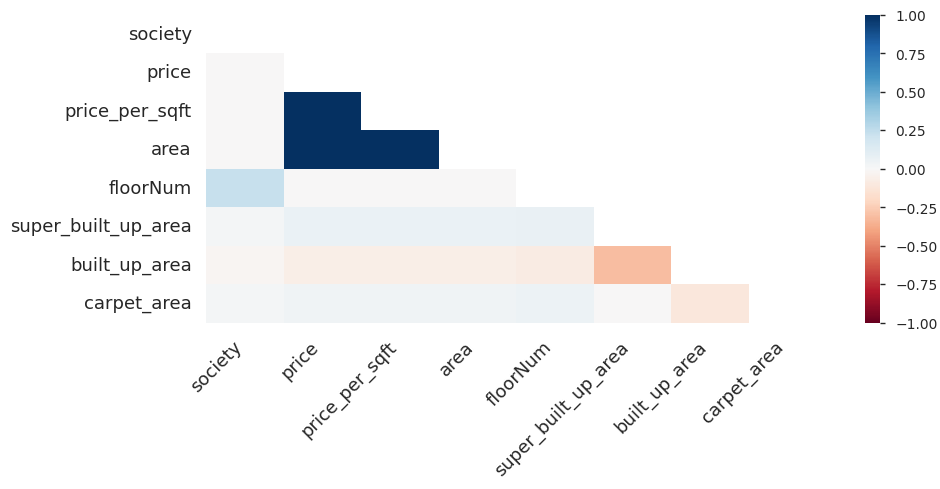

In [80]:
# Generate the report
profile.to_file("output_report.html")

### Bivariate Analysis

In [81]:
pd.set_option('display.max_columns', None)


In [82]:
df = pd.read_csv('gurgaon_properties_cleaned_v2.csv').drop_duplicates()


### property_type vs price


<Axes: xlabel='property_type', ylabel='price'>

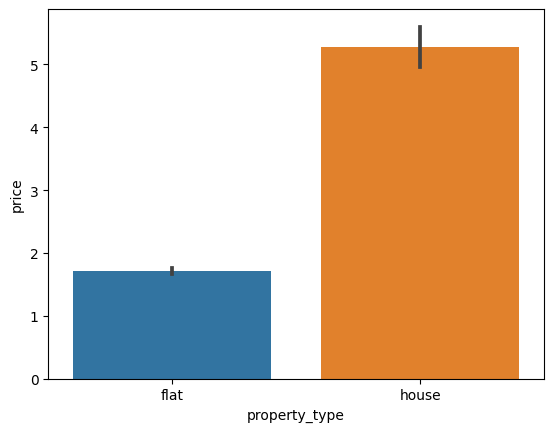

In [83]:
sns.barplot(x=df['property_type'], y=df['price'])


<Axes: xlabel='property_type', ylabel='price'>

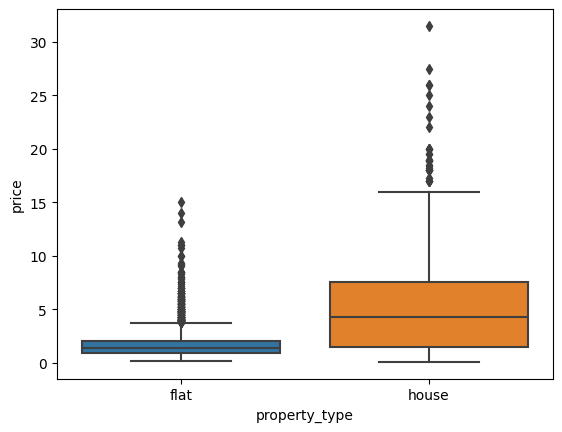

In [84]:
sns.boxplot(x=df['property_type'], y=df['price'])


### property_type vs area


<Axes: xlabel='property_type', ylabel='built_up_area'>

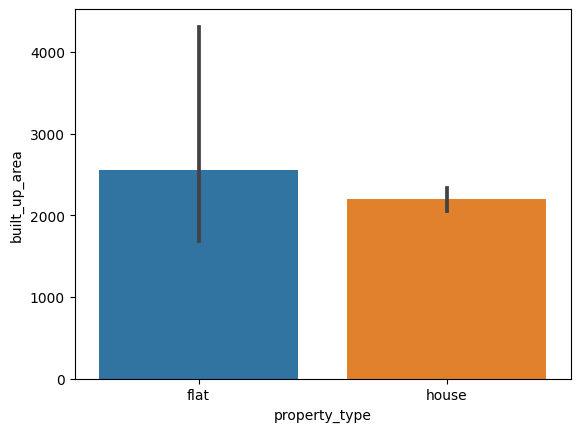

In [85]:
sns.barplot(x=df['property_type'], y=df['built_up_area'])


<Axes: xlabel='property_type', ylabel='built_up_area'>

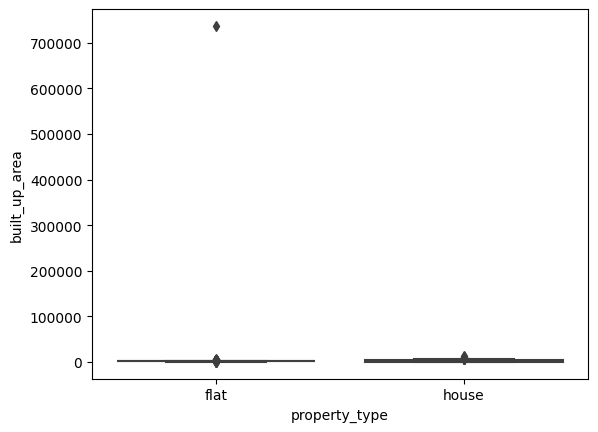

In [86]:
sns.boxplot(x=df['property_type'], y=df['built_up_area'])


In [87]:
# removing that crazy outlier
df = df[df['built_up_area'] != 737147]

<Axes: xlabel='property_type', ylabel='built_up_area'>

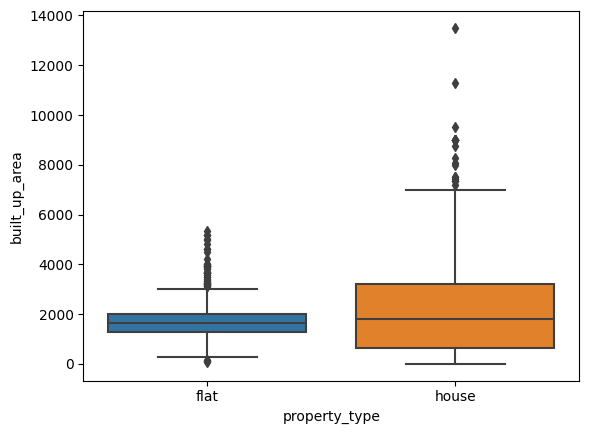

In [88]:
sns.boxplot(x=df['property_type'], y=df['built_up_area'])


### property_type vs price_per_sqft


<Axes: xlabel='property_type', ylabel='price_per_sqft'>

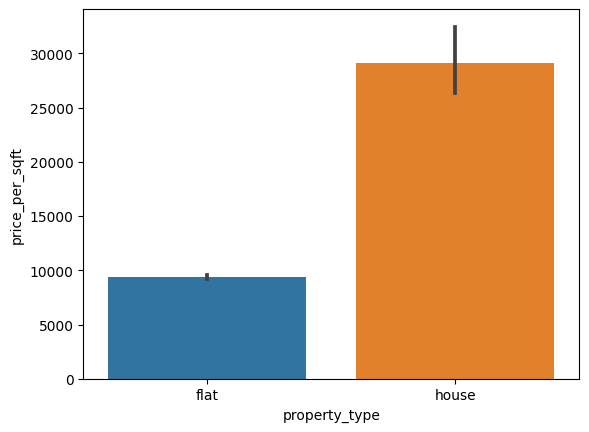

In [89]:
sns.barplot(x=df['property_type'], y=df['price_per_sqft'])


<Axes: xlabel='property_type', ylabel='price_per_sqft'>

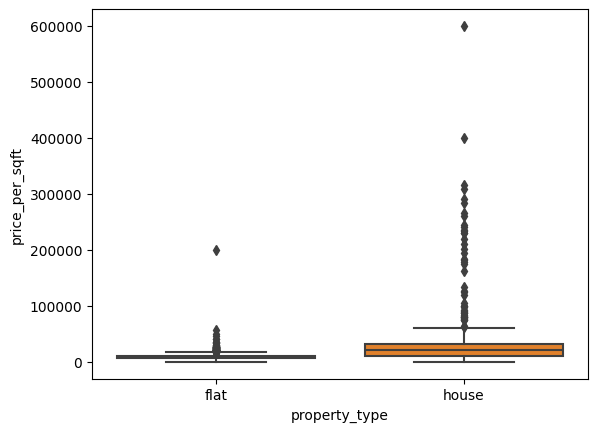

In [90]:
sns.boxplot(x=df['property_type'], y=df['price_per_sqft'])


In [91]:

# check outliers
df[df['price_per_sqft'] > 100000][['property_type','society','sector','price','price_per_sqft','area','areaWithType', 'super_built_up_area', 'built_up_area', 'carpet_area']]

property_type                      society     sector  price  \
229          house                    rk excelo  sector 12   0.60   
336          house                  independent  sector 28   4.50   
342          house  unitech nirvana birch court  sector 50   7.10   
545          house                  independent  sector 24  10.00   
867          house                   ardee city  sector 52   5.50   
975          house               uppal southend  sector 49   6.75   
1027         house                dlf the grove  sector 54   5.70   
1062         house                  independent  sector 23   2.80   
1259         house           vipul tatvam villa  sector 48   7.25   
1385         house     unitech uniworld resorts  sector 33   9.50   
1628         house         eros rosewood villas  sector 49   2.75   
1925         house                  independent   sector 4   0.60   
2004         house                  independent  sector 17   3.50   
2047         house                        ansal  sector 43   1.85   
2088         house                  independent  sector 12   3.50   
2161         house       dlf city plots phase 2  sector 25  10.50   
2277         house                  independent  sector 55   1.45   
2418          flat           ambience caitriona  sector 24  14.00   
2461         house                  independent  sector 12   6.00   
2738         house            vatika india next  sector 82   7.00   
2850         house       dlf city plots phase 2  sector 25  10.00   
3015         house       unitech deerwood chase  sector 50   8.45   
3046         house       emaar the palm springs  sector 54  24.00   
3148         house         bhim nagar, sector 6   sector 6   0.85   
3279         house     unitech uniworld resorts  sector 33  10.00   
3356         house                  independent  sector 54   3.75   
3386         house                  independent  sector 38   8.00   
3449         house                  independent  sector 57   8.00   
3519         house          huda plot sector 38  sector 38   4.30   

      price_per_sqft   area  \
229         120000.0   50.0   
336         125000.0  360.0   
342         283333.0  251.0   
545         229885.0  435.0   
867         183333.0  300.0   
975         290948.0  232.0   
1027        211111.0  270.0   
1062        161849.0  173.0   
1259        201388.0  360.0   
1385        173992.0  546.0   
1628        178571.0  154.0   
1925        105263.0   57.0   
2004        218750.0  160.0   
2047        308333.0   60.0   
2088        133079.0  263.0   
2161        261194.0  402.0   
2277        241666.0   60.0   
2418        200000.0  700.0   
2461        315789.0  190.0   
2738        194444.0  360.0   
2850        400000.0  250.0   
3015        235376.0  359.0   
3046        600000.0  400.0   
3148        126865.0   67.0   
3279        181818.0  550.0   
3356        234375.0  160.0   
3386        230547.0  347.0   
3449        266666.0  300.0   
3519        245398.0  175.0   

                                           areaWithType  super_built_up_area  \
229   Plot area 50(4.65 sq.m.)Built Up area: 30 sq.f...                  NaN   
336                    Built Up area: 360 (33.45 sq.m.)                  NaN   
342                           Plot area 240(22.3 sq.m.)                  NaN   
545                      Carpet area: 435 (40.41 sq.m.)                  NaN   
867                          Plot area 300(27.87 sq.m.)                  NaN   
975                          Plot area 232(21.55 sq.m.)                  NaN   
1027                   Built Up area: 270 (25.08 sq.m.)                  NaN   
1062  Plot area 173(16.07 sq.m.)Built Up area: 160 s...                  NaN   
1259                         Plot area 360(33.45 sq.m.)                  NaN   
1385                         Plot area 546(50.73 sq.m.)                  NaN   
1628  Plot area 154(14.31 sq.m.)Carpet area: 1650 sq...                  NaN   
1925                            Plot area 5

<Axes: xlabel='bedRoom', ylabel='property_type'>

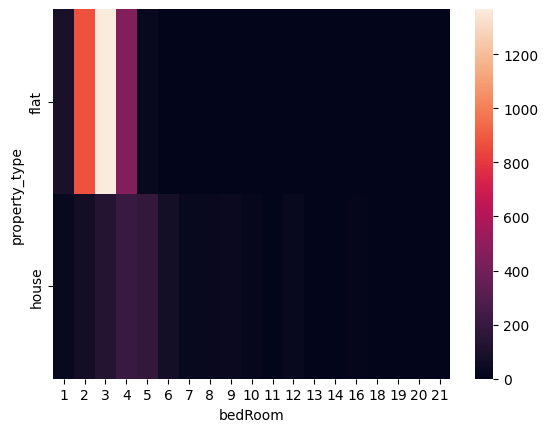

In [92]:
sns.heatmap(pd.crosstab(df['property_type'],df['bedRoom']))


In [93]:
# checking outliers
df[df['bedRoom'] >= 10]

property_type                    society     sector  price  \
19           house                independent  sector 54   5.50   
48           house  ganpati heights apartment  sector 13   1.25   
66           house                independent  sector 13   0.50   
78           house                independent  sector 17   3.87   
119          house                independent  sector 55   7.49   
...            ...                        ...        ...    ...   
3479         house                independent  sector 25    NaN   
3519         house        huda plot sector 38  sector 38   4.30   
3618         house                independent  sector 54   5.00   
3698         house                independent  sector 55   9.19   
3713         house                independent  sector 41   4.25   

      price_per_sqft     area  \
19           38194.0   1440.0   
48             151.0  82781.0   
66           90909.0     55.0   
78            5160.0   7500.0   
119          27741.0   2700.0   
...              ...      ...   
3479             NaN      NaN   
3519        245398.0    175.0   
3618         43066.0   1161.0   
3698         34037.0   2700.0   
3713         26235.0   1620.0   

                                           areaWithType  bedRoom  bathroom  \
19                          Plot area 160(133.78 sq.m.)       18        18   
48                         Plot area 115(7692.86 sq.m.)       10         6   
66                             Plot area 55(5.11 sq.m.)       12         4   
78    Plot area 1623(150.78 sq.m.)Built Up area: 750...       19        17   
119                         Plot area 300(250.84 sq.m.)       12        12   
...                                                 ...      ...       ...   
3479  Plot area 250(209.03 sq.m.)Built Up area: 260 ...       12        12   
3519  Plot area 163(15.14 sq.m.)Built Up area: 145 s...       13        13   
3618                        Plot area 129(107.86 sq.m.)       21        21   
3698                        Plot area 300(250.84 sq.m.)       16        18   
3713                         Plot area 180(150.5 sq.m.)       10         9   

     balcony  floorNum      facing   agePossession  super_built_up_area  \
19        3+       4.0  South-West  Relatively New                  NaN   
48         2       3.0  South-East    Old Property                  NaN   
66         3       4.0         NaN    Old Property                  NaN   
78        3+       5.0  North-West  Relatively New                  NaN   
119       3+       4.0  South-East  Relatively New                  NaN   
...      ...       ...         ...             ...                  ...   
3479      3+       4.0  North-East    New Property                  NaN   
3519      3+       5.0  North-West  Relatively New                  NaN   
3618      3+       5.0       North  Relatively New                  NaN   
3698       2       4.0        West    New Property                  NaN   
3713      3+       4.0       North  Moderately Old                  NaN   

      built_up_area  carpet_area  study room  servant room  store room  \
19           1440.0          NaN           0             1           0   
48            115.0          NaN           0             0           0   
66             55.0          NaN           0             0           0   
78           7500.0          NaN           1             0           1   
119          2700.0          NaN           1             1           0   
...             ...          ...         ...           ...         ...   
3479          260.0        245.0           1             1           0   
3519          145.0          NaN           0             0           0   
3618         1161.0          NaN           0             1           0   
3698         2700.0          NaN           0             1           0   
3713         1620.0          NaN           1             1           0   

      pooja room  others  furnishing_type  luxury_score  
19             0  

<Axes: xlabel='property_type', ylabel='floorNum'>

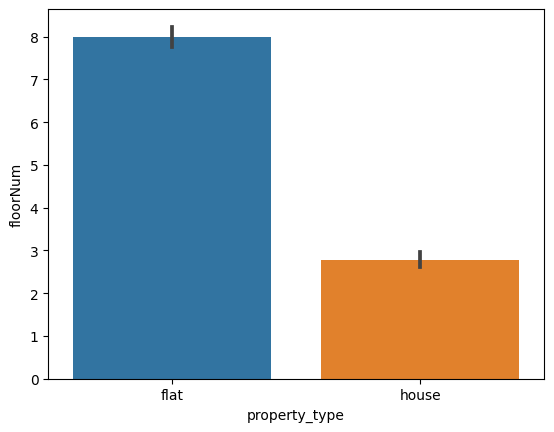

In [94]:
sns.barplot(x=df['property_type'],y=df['floorNum'])


<Axes: xlabel='property_type', ylabel='floorNum'>

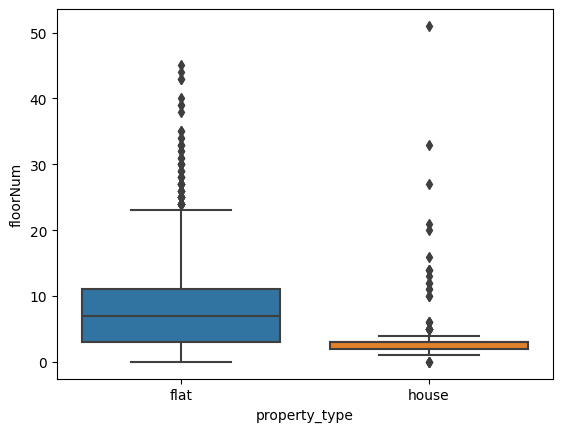

In [95]:
sns.boxplot(x=df['property_type'],y=df['floorNum'])


In [96]:
# checking for outliers
df[(df['property_type'] == 'house') & (df['floorNum'] > 10)]

property_type                  society      sector  price  \
35           house              greenopolis   sector 89   0.70   
106          house        suncity avenue 76   sector 76   0.75   
267          house               ninex city   sector 76   1.75   
338          house              spaze privy   sector 72   3.09   
420          house              spaze privy   sector 72   3.10   
1297         house  indiabulls centrum park  sector 103   3.25   
2147         house      ireo victory valley   sector 67   8.00   
2167         house         suncity township   sector 54   2.00   
2556         house           dlf the arbour   sector 63   8.50   
2796         house              independent   sector 92   1.80   
2969         house      satya the hermitage  sector 103   3.15   
2973         house          godrej meridien  sector 106   5.60   
3224         house   vatika the seven lamps   sector 82   1.60   
3668         house           ats tourmaline  sector 109   1.87   

      price_per_sqft    area  \
35            5397.0  1297.0   
106          10067.0   745.0   
267           6250.0  2800.0   
338           6981.0  4426.0   
420           8486.0  3653.0   
1297          8125.0  4000.0   
2147         22222.0  3600.0   
2167         30968.0   646.0   
2556         21519.0  3950.0   
2796          7627.0  2360.0   
2969          6702.0  4700.0   
2973         14000.0  4000.0   
3224          6597.0  2425.0   
3668          8697.0  2150.0   

                                           areaWithType  bedRoom  bathroom  \
35                    Built Up area: 1297 (120.5 sq.m.)        2         2   
106   Plot area 745(69.21 sq.m.)Built Up area: 745 s...        2         2   
267                    Carpet area: 2800 (260.13 sq.m.)        4         4   
338   Built Up area: 3653 (339.37 sq.m.)Carpet area:...        5         5   
420                        Plot area 3653(339.37 sq.m.)        5         5   
1297                       Plot area 4000(371.61 sq.m.)        4         3   
2147                        Plot area 400(334.45 sq.m.)        6         7   
2167  Plot area 60Built Up area: 60 sq.m.Carpet area...        9         9   
2556                 Built Up area: 3950 (366.97 sq.m.)        4         4   
2796                 Built Up area: 2360 (219.25 sq.m.)        4         5   
2969                 Built Up area: 4700 (436.64 sq.m.)        4         5   
2973                       Plot area 4000(371.61 sq.m.)        5         4   
3224                       Plot area 2425(225.29 sq.m.)        4         4   
3668                 Built Up area: 2150 (199.74 sq.m.)        3         4   

     balcony  floorNum      facing       agePossession  super_built_up_area  \
35         2      14.0  North-East           Undefined                  NaN   
106        2      11.0  North-East        New Property                  NaN   
267        0      14.0         NaN           Undefined                  NaN   
338       3+      14.0        East      Relatively New                  NaN   
420       3+      21.0         NaN      Relatively New                  NaN   
1297      3+      20.0         NaN  Under Construction                  NaN   
2147      3+      51.0  North-East      Moderately Old                  NaN   
2167       3      11.0       North      Relatively New                  NaN   
2556      3+      27.0         NaN           Undefined                  NaN   
2796       0      13.0         NaN           Undefined                  NaN   
2969       0      12.0        East           Undefined                  NaN   
2973      3+      33.0  North-East        New Property                  NaN   
3224      3+      16.0       North      Moderately Old                  NaN   
3668       0      12.0         NaN           Undefined                  NaN   

      built_up_area  carpet_area  study room  servant room  store room  \
35           1297.0          NaN           0             0           0   
106           745.0         

<Axes: xlabel='agePossession', ylabel='property_type'>

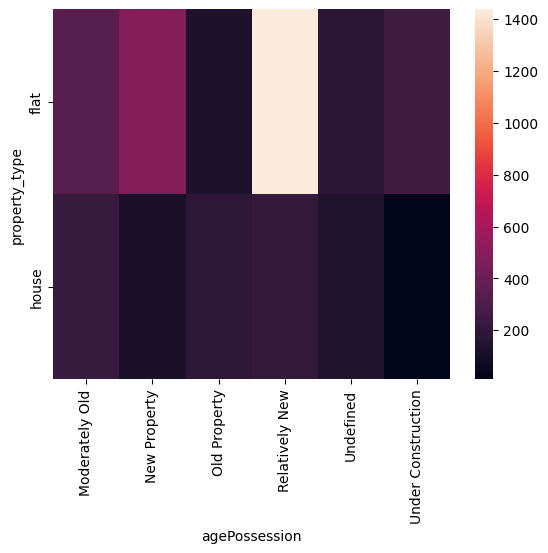

In [97]:
sns.heatmap(pd.crosstab(df['property_type'],df['agePossession']))


<Axes: xlabel='agePossession', ylabel='property_type'>

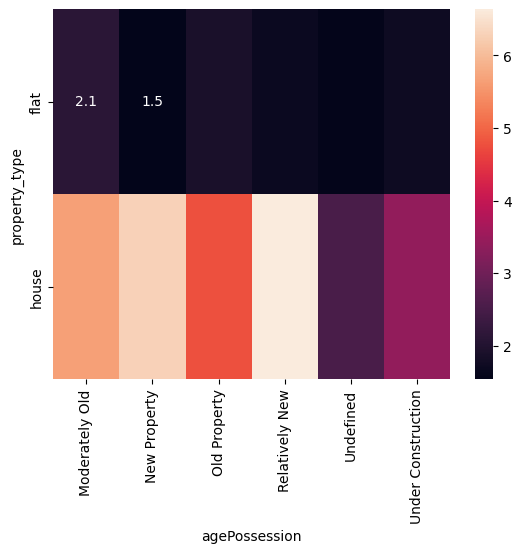

In [98]:
sns.heatmap(pd.pivot_table(df,index='property_type',columns='agePossession',values='price',aggfunc='mean'),annot=True)


<Axes: xlabel='bedRoom', ylabel='property_type'>

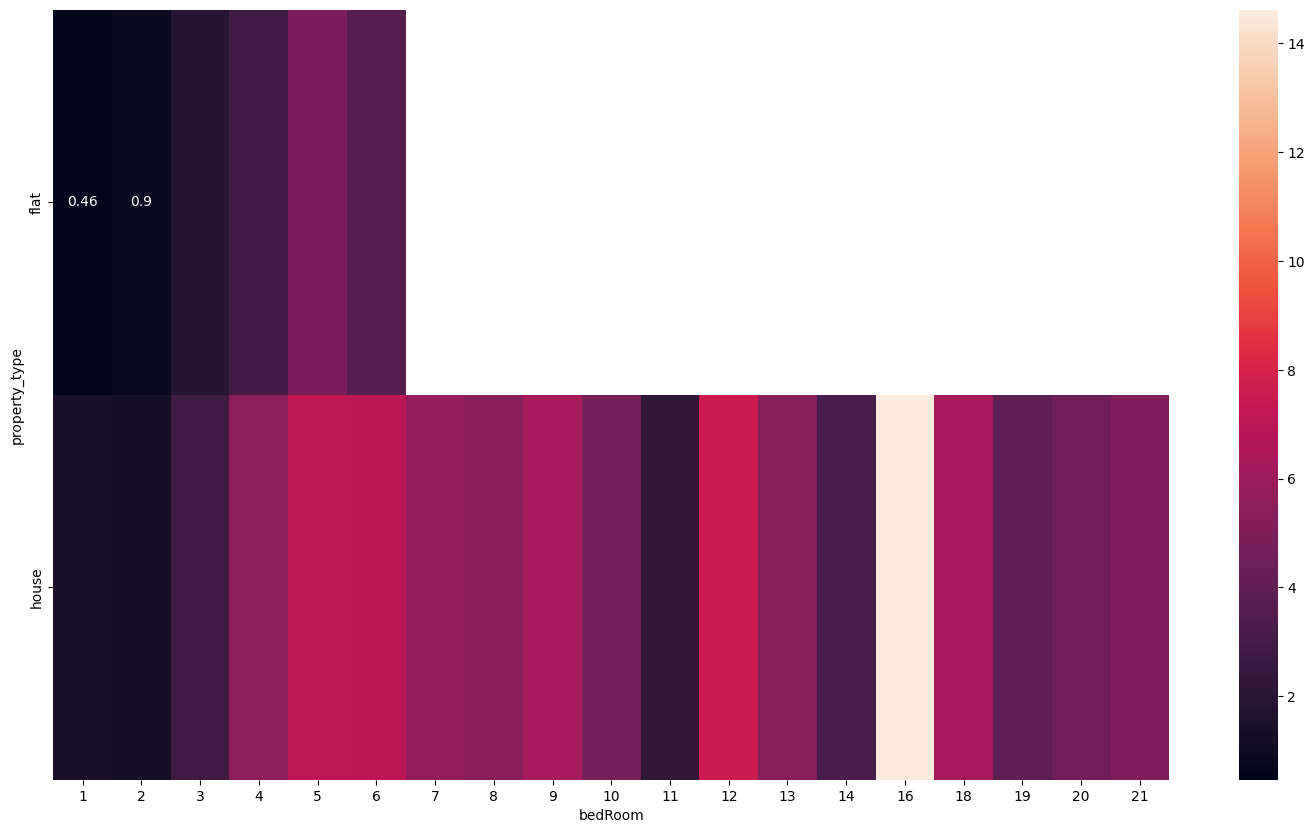

In [119]:
plt.figure(figsize=(18,10))
sns.heatmap(pd.pivot_table(df,index='property_type',columns='bedRoom',values='price',aggfunc='mean'),annot=True)

<Axes: xlabel='furnishing_type', ylabel='property_type'>

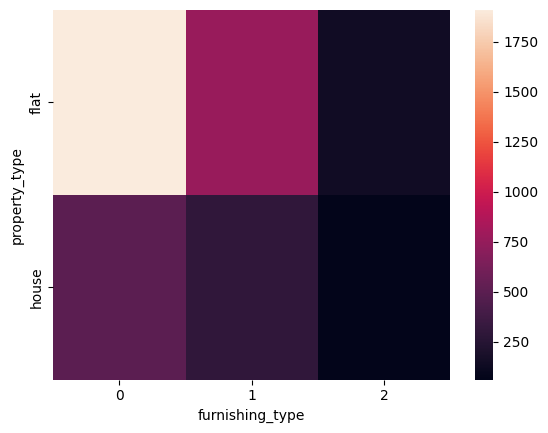

In [100]:
sns.heatmap(pd.crosstab(df['property_type'],df['furnishing_type']))


<Axes: xlabel='furnishing_type', ylabel='property_type'>

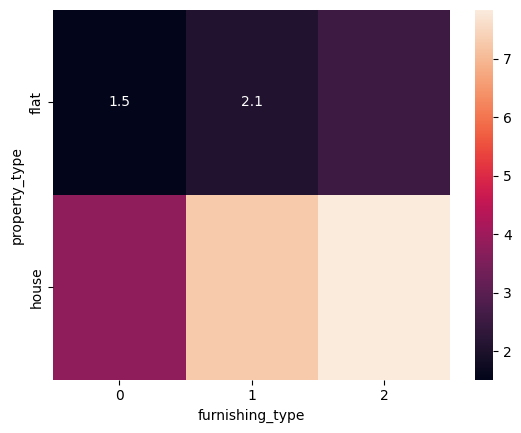

In [101]:
sns.heatmap(pd.pivot_table(df,index='property_type',columns='furnishing_type',values='price',aggfunc='mean'),annot=True)


<Axes: xlabel='property_type', ylabel='luxury_score'>

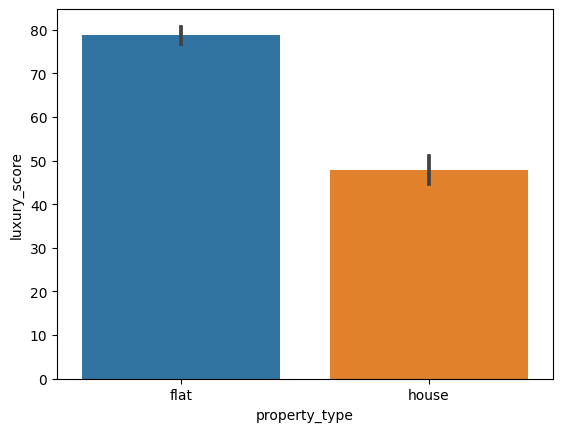

In [102]:
sns.barplot(x=df['property_type'],y=df['luxury_score'])


<Axes: xlabel='property_type', ylabel='luxury_score'>

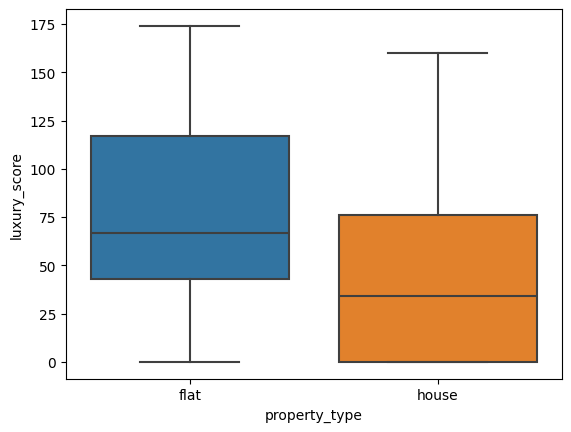

In [103]:
sns.boxplot(x=df['property_type'],y=df['luxury_score'])


<Axes: xlabel='sector', ylabel='property_type'>

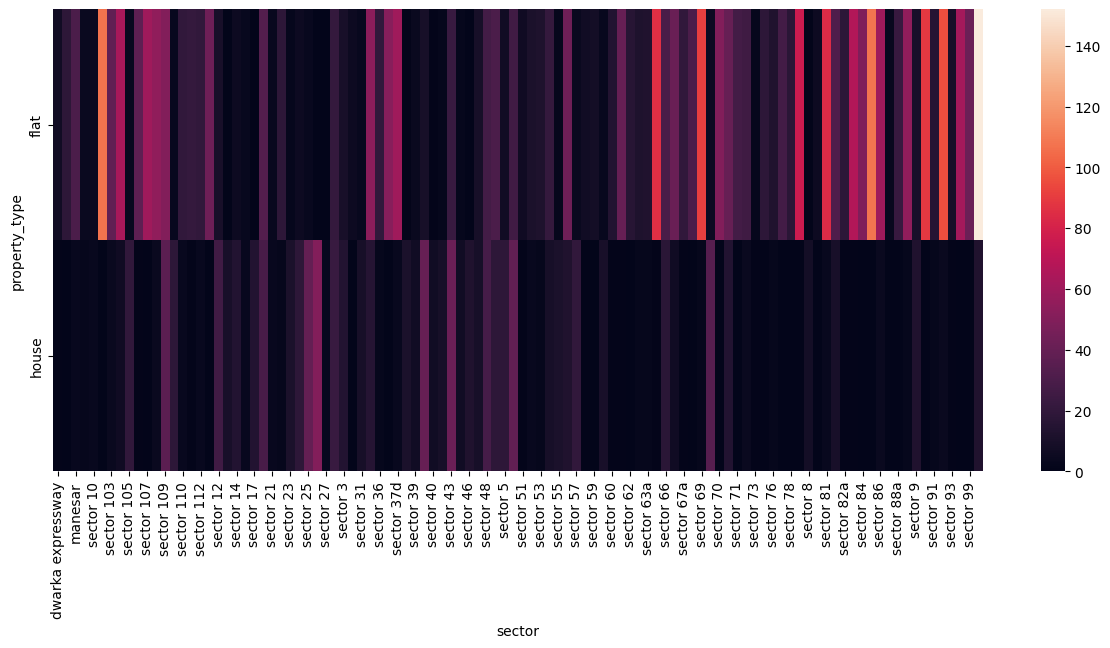

In [104]:
# sector analysis
plt.figure(figsize=(15,6))
sns.heatmap(pd.crosstab(df['property_type'],df['sector'].sort_index()))

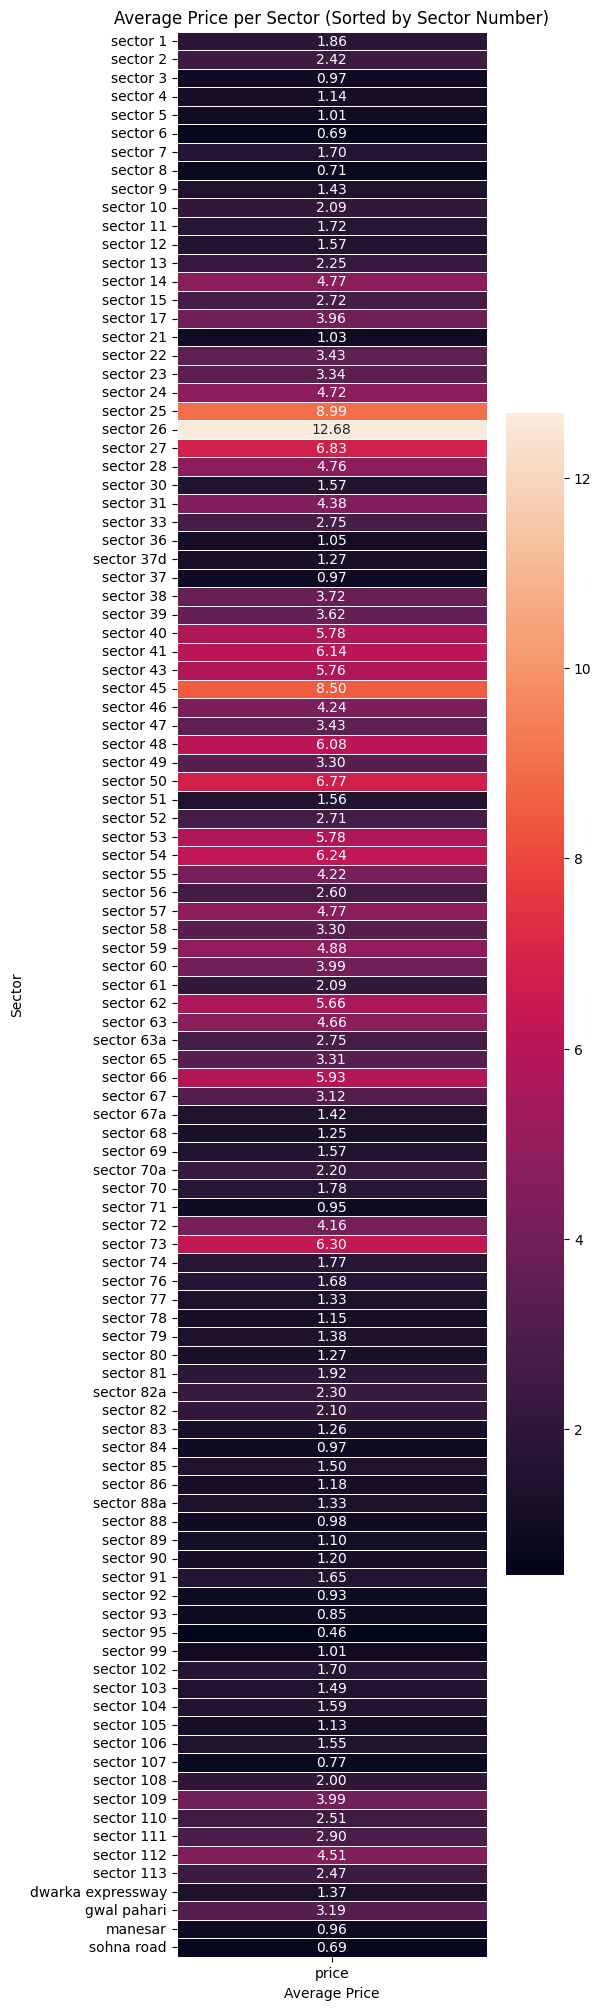

In [105]:
# sector analysis
import re
# Group by 'sector' and calculate the average price
avg_price_per_sector = df.groupby('sector')['price'].mean().reset_index()

# Function to extract sector numbers
def extract_sector_number(sector_name):
    match = re.search(r'\d+', sector_name)
    if match:
        return int(match.group())
    else:
        return float('inf')  # Return a large number for non-numbered sectors

avg_price_per_sector['sector_number'] = avg_price_per_sector['sector'].apply(extract_sector_number)

# Sort by sector number
avg_price_per_sector_sorted_by_sector = avg_price_per_sector.sort_values(by='sector_number')

# Plot the heatmap
plt.figure(figsize=(5, 25))
sns.heatmap(avg_price_per_sector_sorted_by_sector.set_index('sector')[['price']], annot=True, fmt=".2f", linewidths=.5)
plt.title('Average Price per Sector (Sorted by Sector Number)')
plt.xlabel('Average Price')
plt.ylabel('Sector')
plt.show()

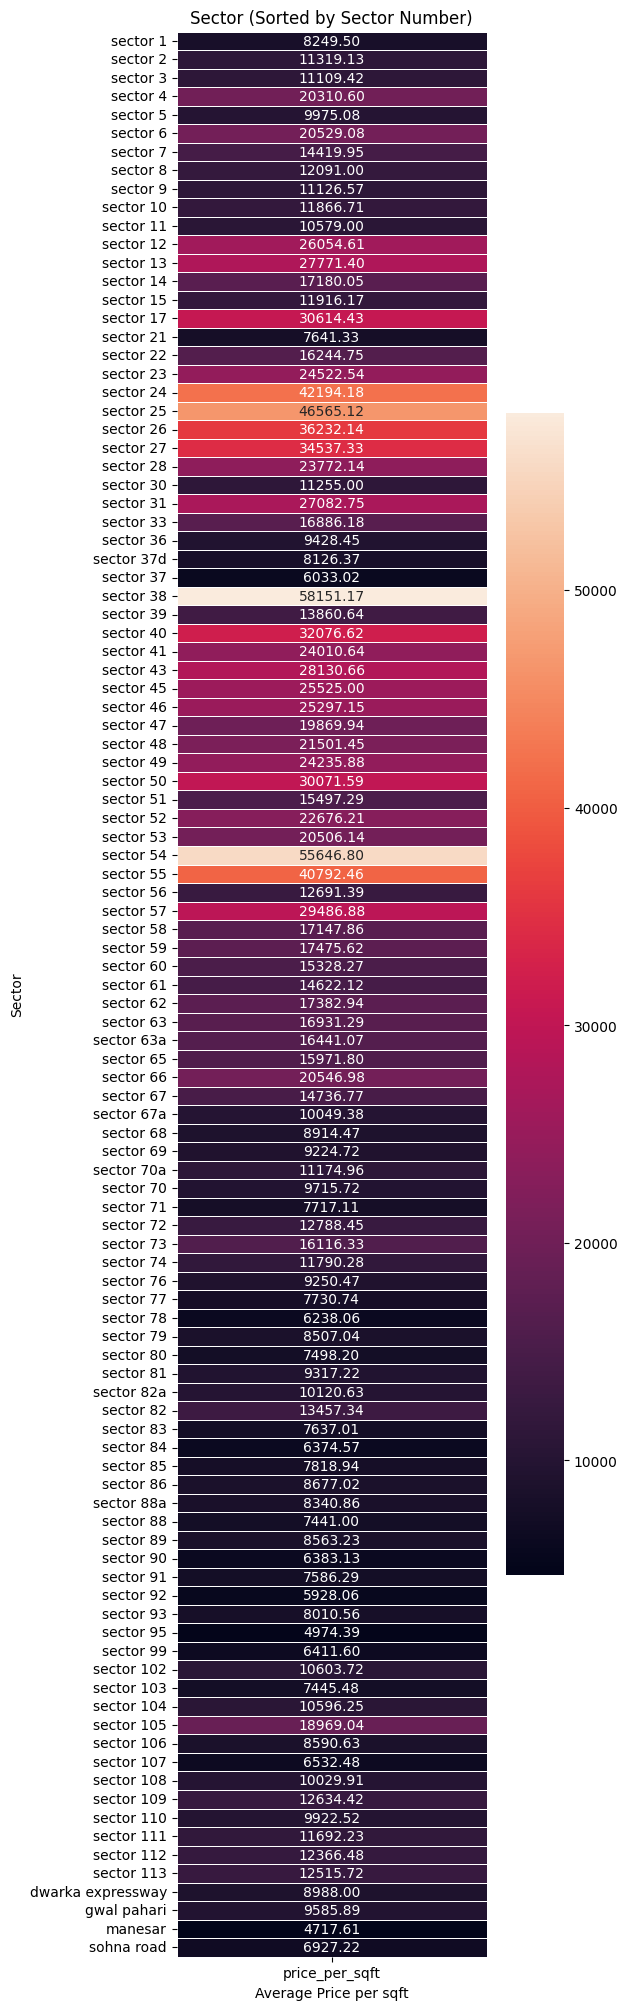

In [106]:
avg_price_per_sqft_sector = df.groupby('sector')['price_per_sqft'].mean().reset_index()

avg_price_per_sqft_sector['sector_number'] = avg_price_per_sqft_sector['sector'].apply(extract_sector_number)

# Sort by sector number
avg_price_per_sqft_sector_sorted_by_sector = avg_price_per_sqft_sector.sort_values(by='sector_number')

# Plot the heatmap
plt.figure(figsize=(5, 25))
sns.heatmap(avg_price_per_sqft_sector_sorted_by_sector.set_index('sector')[['price_per_sqft']], annot=True, fmt=".2f", linewidths=.5)
plt.title('Sector (Sorted by Sector Number)')
plt.xlabel('Average Price per sqft')
plt.ylabel('Sector')
plt.show()

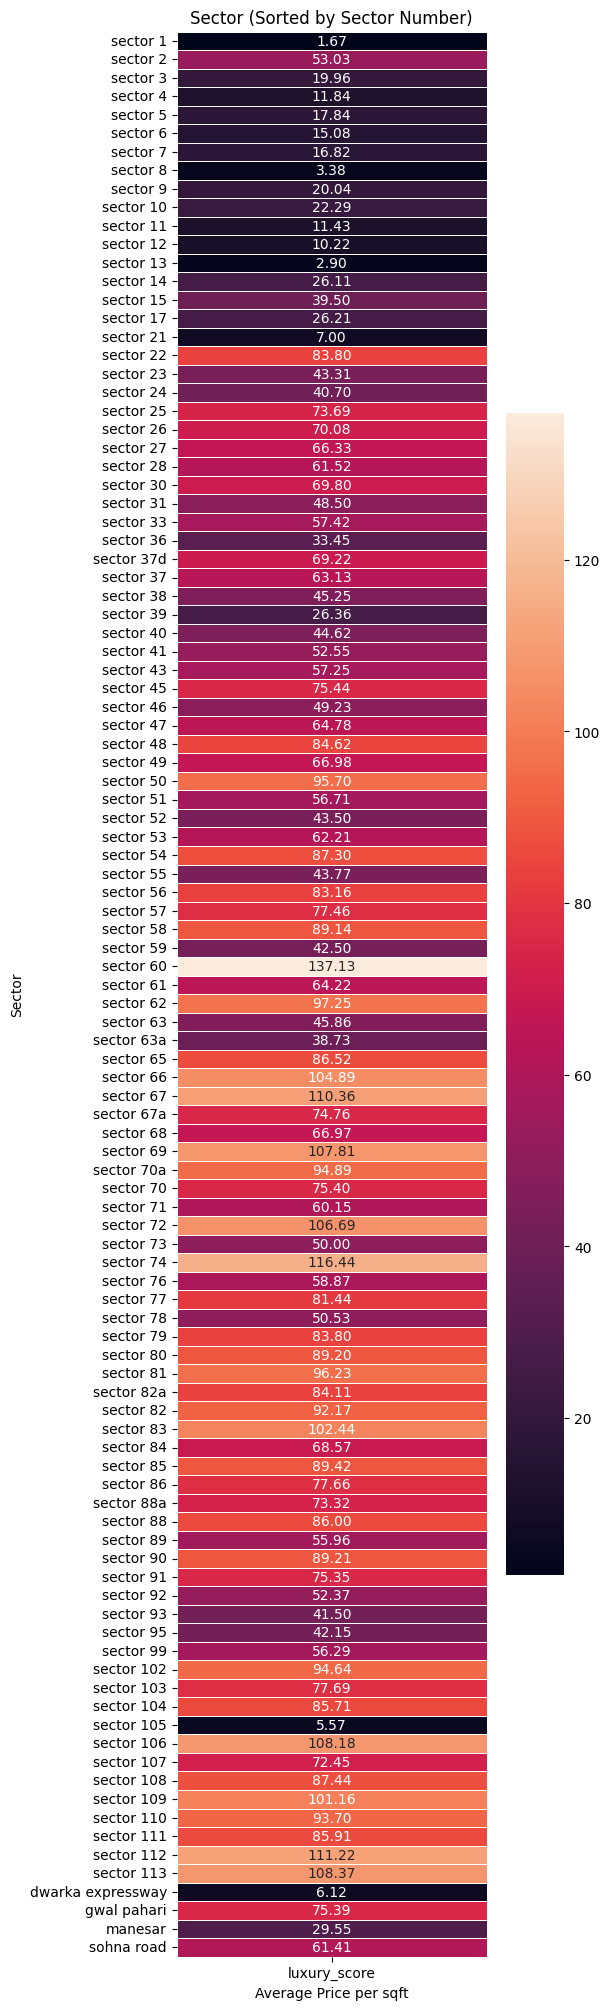

In [107]:
luxury_score = df.groupby('sector')['luxury_score'].mean().reset_index()

luxury_score['sector_number'] = luxury_score['sector'].apply(extract_sector_number)

# Sort by sector number
luxury_score_sector = luxury_score.sort_values(by='sector_number')

# Plot the heatmap
plt.figure(figsize=(5, 25))
sns.heatmap(luxury_score_sector.set_index('sector')[['luxury_score']], annot=True, fmt=".2f", linewidths=.5)
plt.title('Sector (Sorted by Sector Number)')
plt.xlabel('Average Price per sqft')
plt.ylabel('Sector')
plt.show()

### price


<Axes: xlabel='area', ylabel='price'>

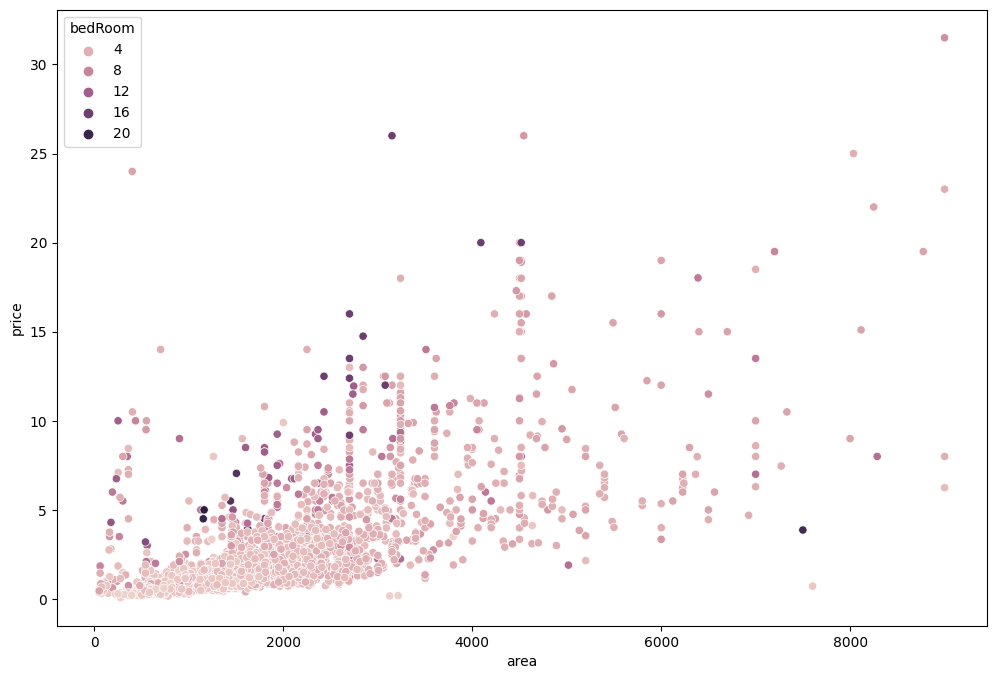

In [108]:
plt.figure(figsize=(12,8))
sns.scatterplot(df[df['area']<10000], x = 'area',y = df['price'],hue=df['bedRoom'])

<Axes: xlabel='area', ylabel='price'>

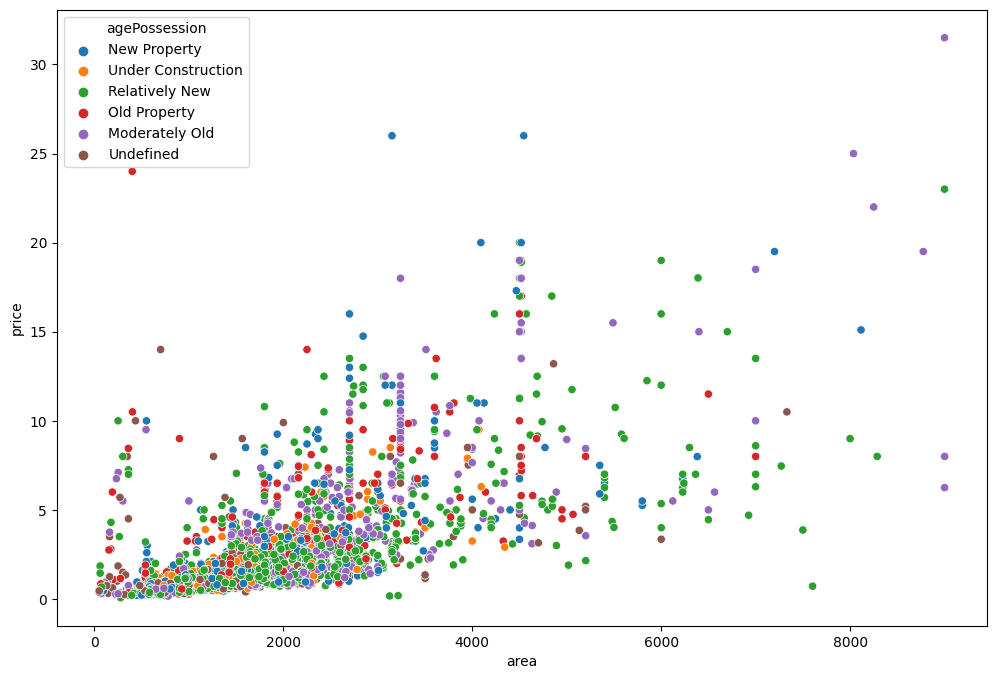

In [109]:
plt.figure(figsize=(12,8))
sns.scatterplot(df[df['area']<10000],x='area',y = df['price'],hue=df['agePossession'])

<Axes: xlabel='area', ylabel='price'>

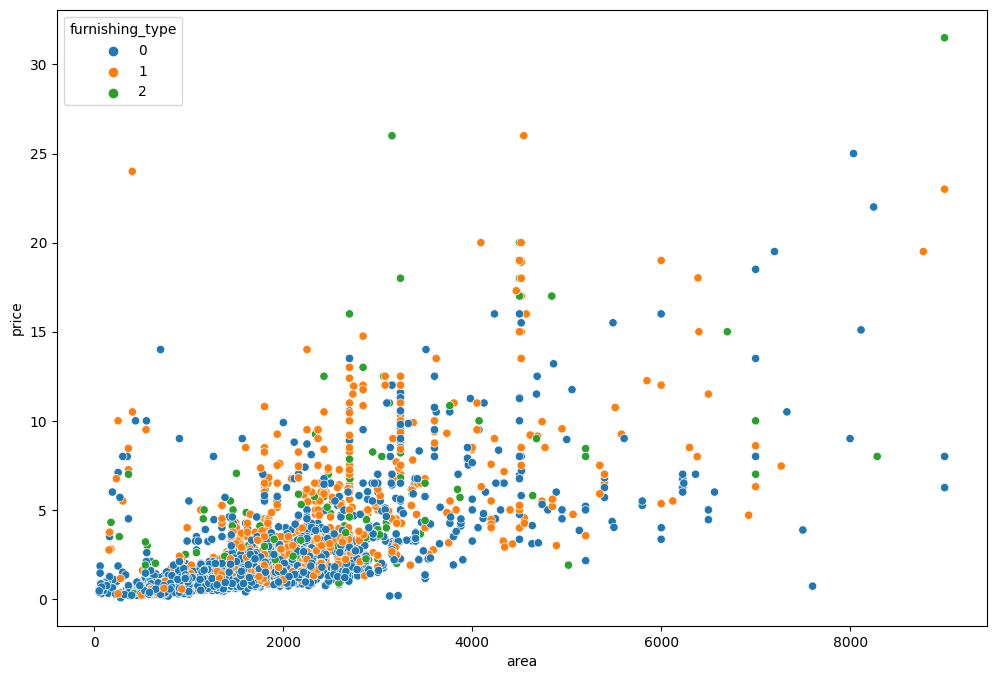

In [110]:
plt.figure(figsize=(12, 8))
sns.scatterplot(data=df[df['area'] < 10000], x='area', y='price', hue=df['furnishing_type'].astype('category'))


<Axes: xlabel='bedRoom', ylabel='price'>

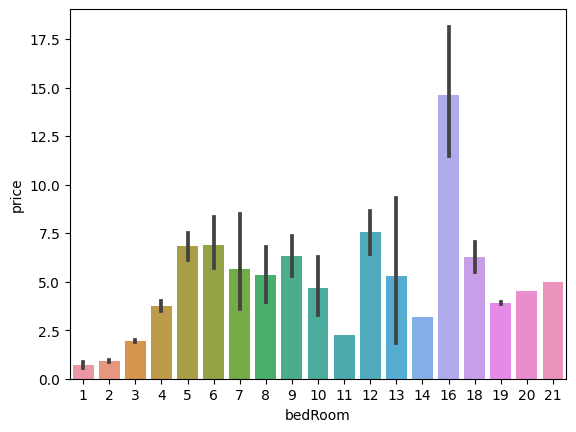

In [111]:
sns.barplot(x=df['bedRoom'],y=df['price'])


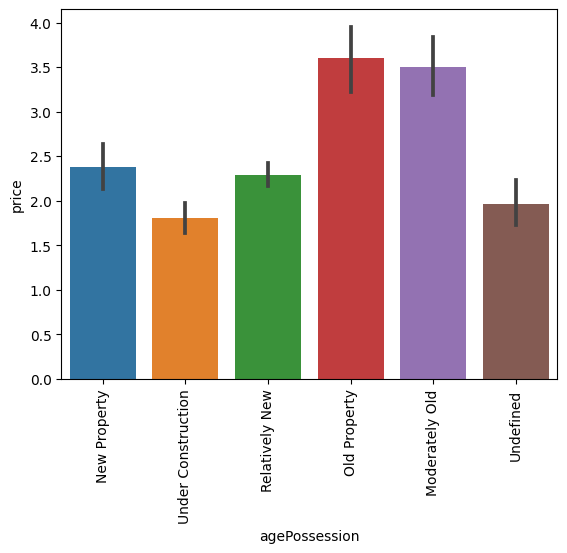

In [112]:
sns.barplot(x=df['agePossession'],y=df['price'])
plt.xticks(rotation=90)
plt.show()

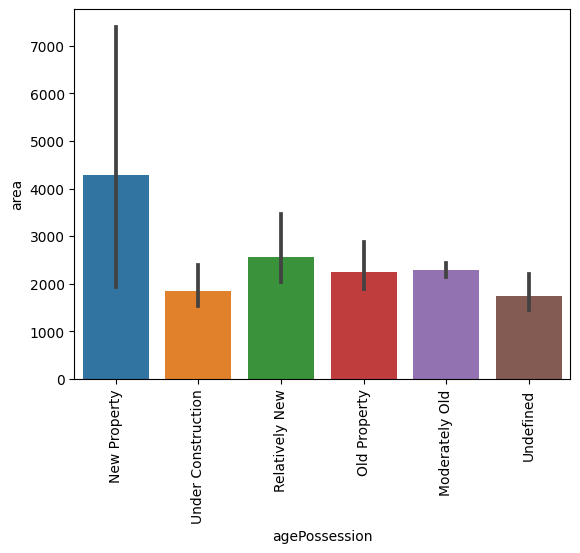

In [113]:
sns.barplot(x=df['agePossession'],y=df['area'])
plt.xticks(rotation='vertical')
plt.show()

<Axes: xlabel='furnishing_type', ylabel='price'>

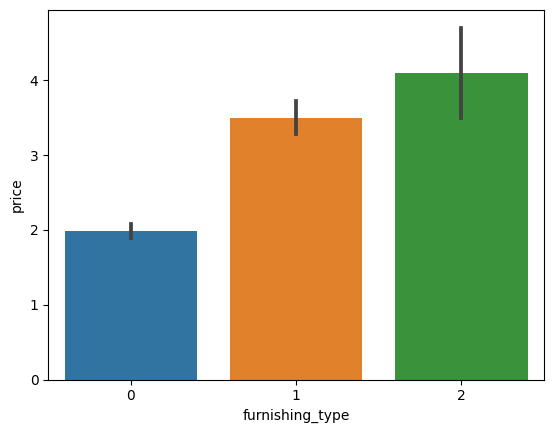

In [114]:
sns.barplot(x=df['furnishing_type'],y=df['price'])


<Axes: xlabel='luxury_score', ylabel='price'>

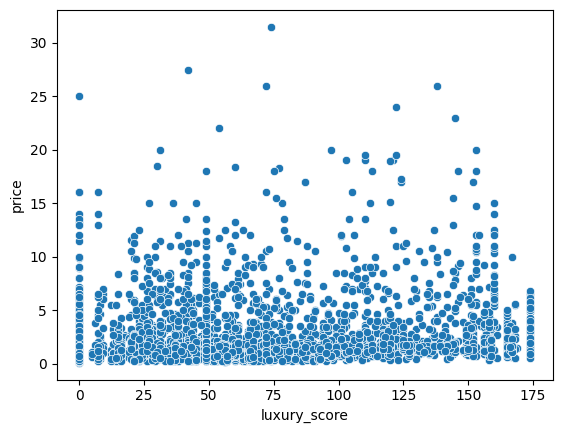

In [115]:
sns.scatterplot(x = df['luxury_score'],y = df['price'])


### correlation


<Axes: >

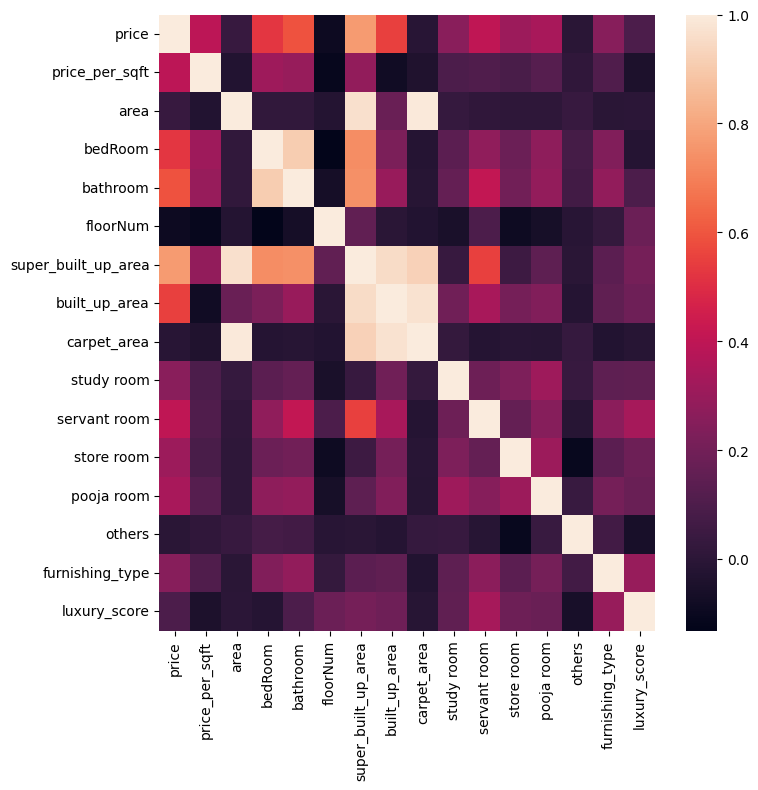

In [116]:
plt.figure(figsize=(8,8))
sns.heatmap(df.corr(numeric_only=True))

In [117]:
df.corr(numeric_only=True)['price'].sort_values(ascending=False)


price                  1.000000
super_built_up_area    0.769412
bathroom               0.589826
built_up_area          0.551649
bedRoom                0.522925
servant room           0.400927
price_per_sqft         0.391251
pooja room             0.341492
store room             0.309121
study room             0.258602
furnishing_type        0.254834
luxury_score           0.094775
area                   0.034720
others                -0.003525
carpet_area           -0.011344
floorNum              -0.094290
Name: price, dtype: float64

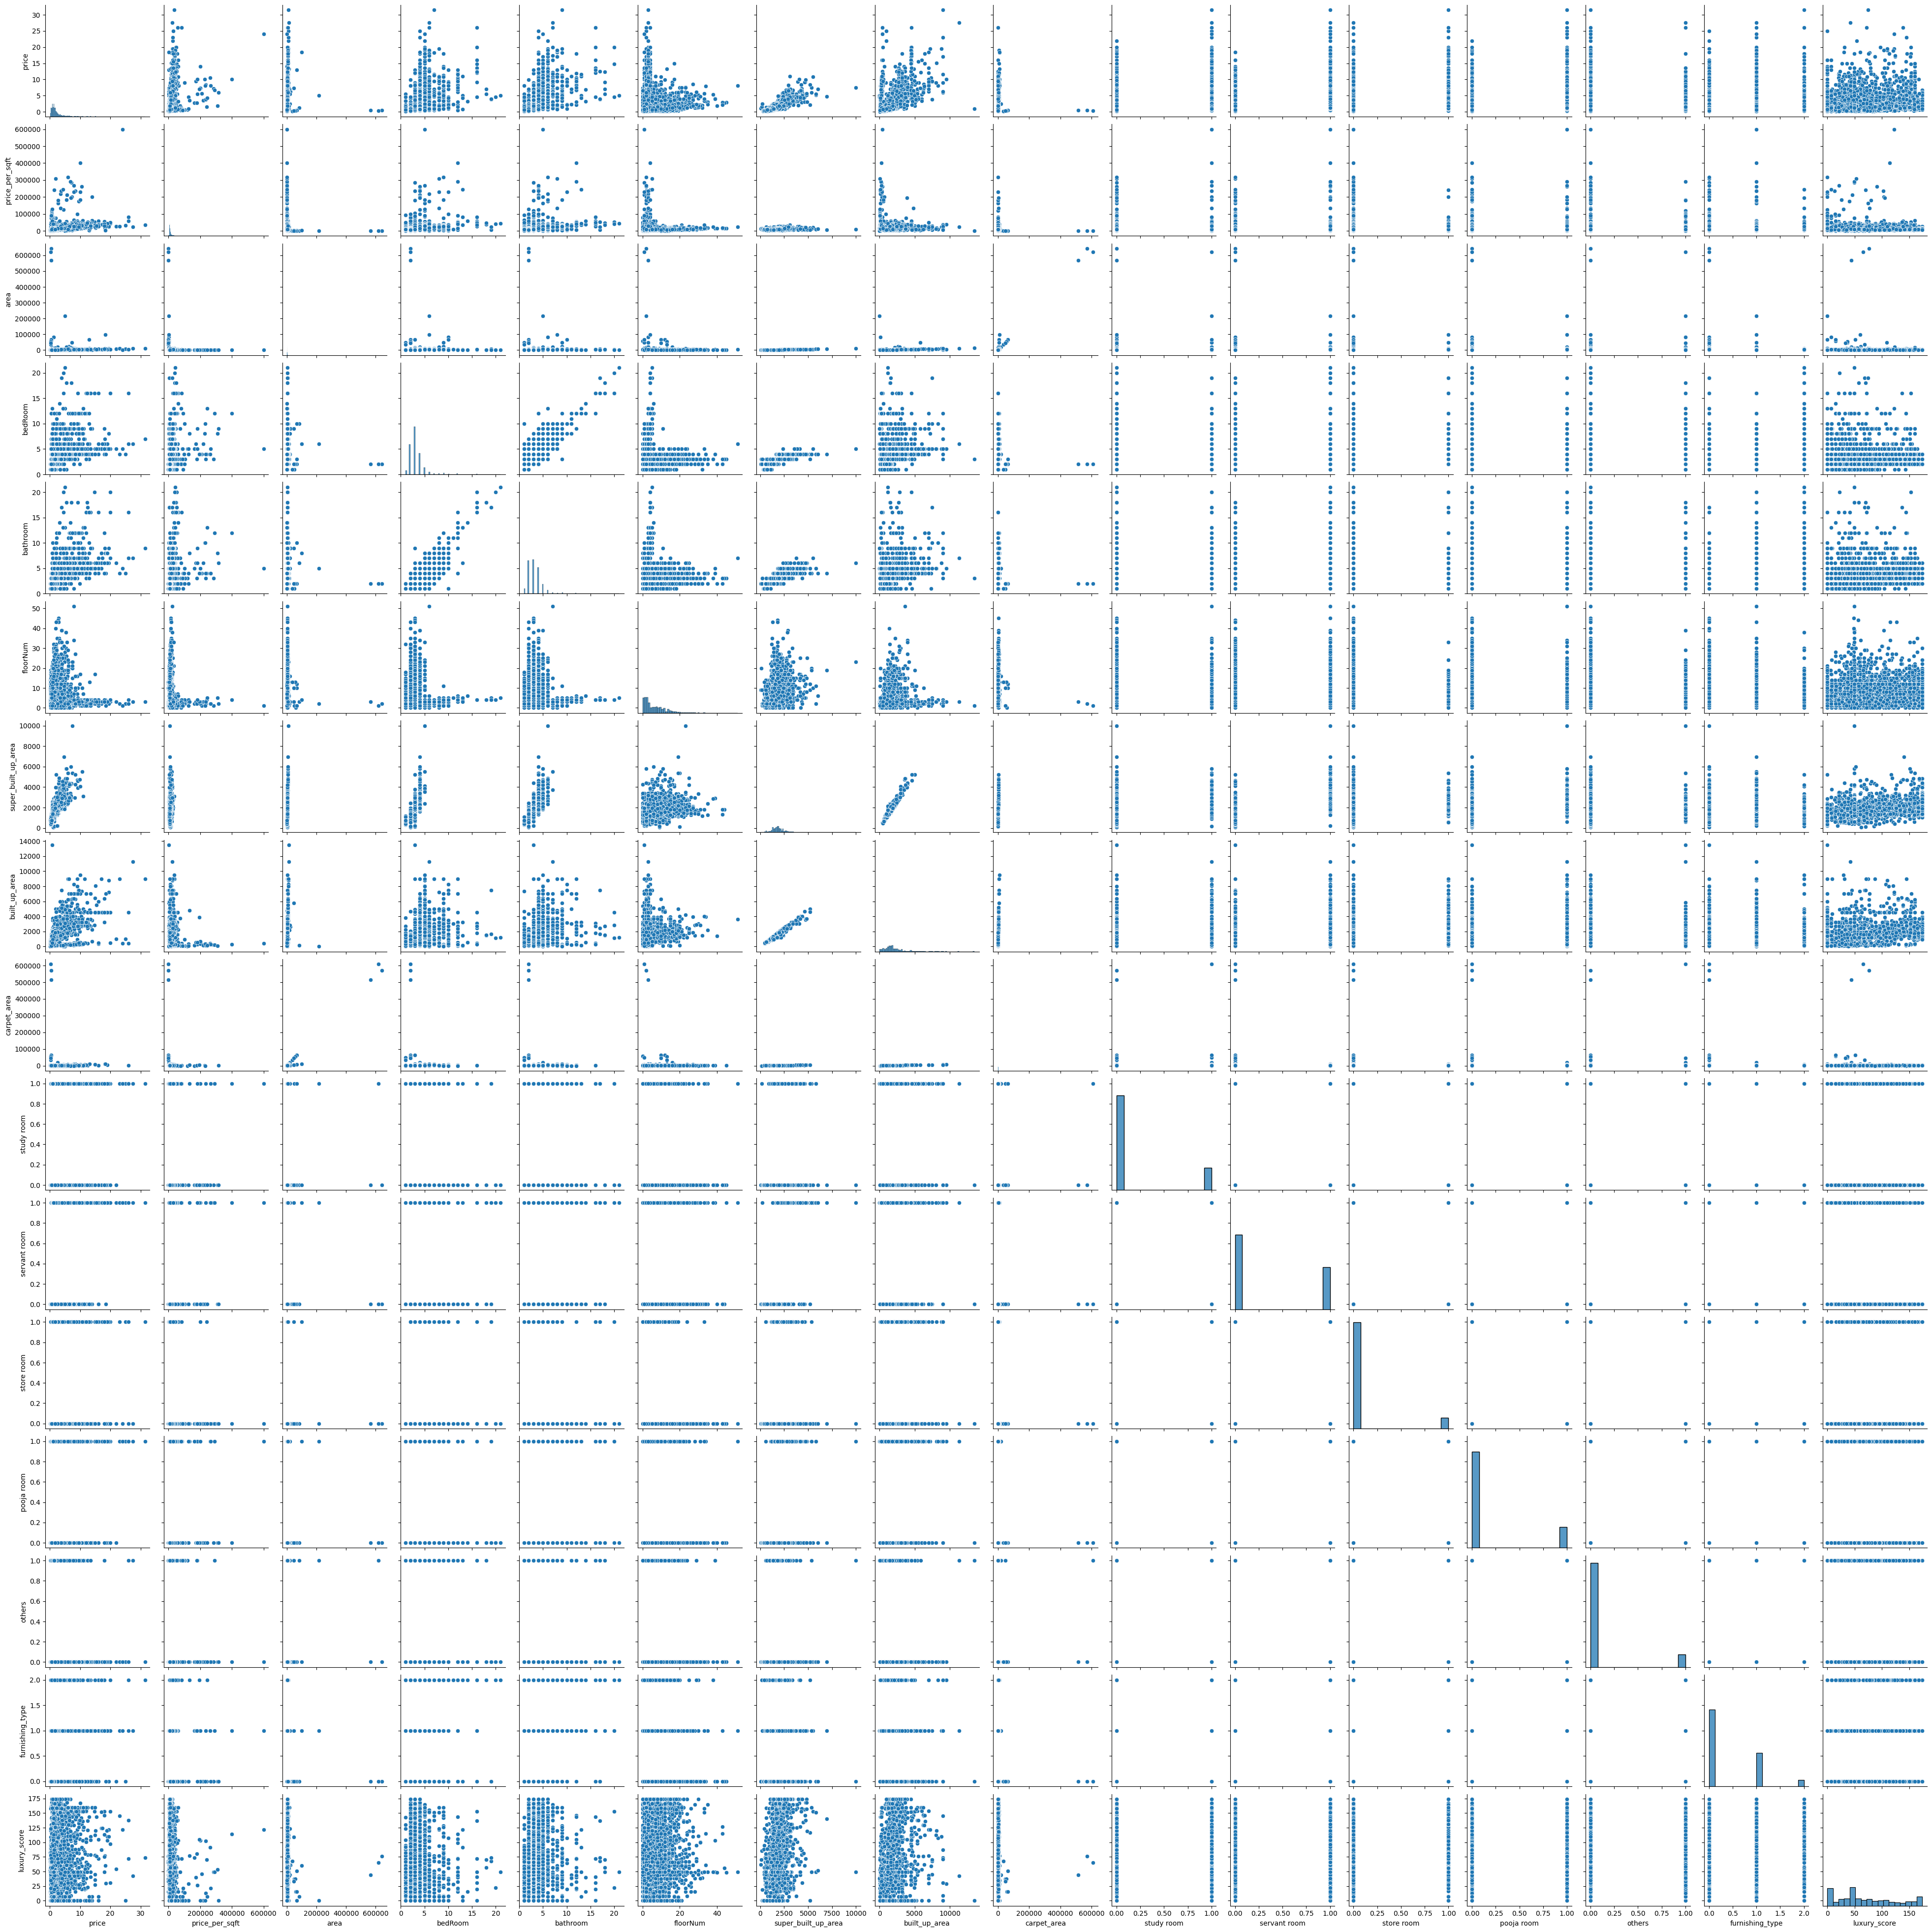

In [118]:
sns.pairplot(df)